# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [188]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [189]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()
data=pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))
df=data.copy()

In [190]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [191]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [193]:
print('There are',df.shape[0],'Rows, and', df.shape[1], 'columns')

There are 36275 Rows, and 19 columns


In [194]:
pd.DataFrame({'Count': df.isnull().sum()}) #isnull to count the missing values

Count
Booking_ID                                0
no_of_adults                              0
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                         0
required_car_parking_space                0
room_type_reserved                        0
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                        0
no_of_special_requests                    0
booking_status                            0

In [195]:
duplicates=df.duplicated().sum() #to check the duplicates
duplicates

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [196]:
df.describe().T 

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

- no_of_adults: The majority of bookings have 1 or 2 adults, as indicated by the mean and median values being close to 2. The maximum number of adults in a booking is 4.

- no_of_children: On average, there are very few children accompanying the guests, with a mean of approximately 0.1.
The maximum number of children in a booking is 10, although the majority of bookings have no children.

- no_of_weekend_nights: The average number of weekend nights booked is approximately 0.8, indicating that guests often stay for short periods over weekends.
The distribution is right-skewed, as the 75th percentile is 2 weekend nights, while the maximum is 7.

- no_of_week_nights: On average, guests stay for approximately 2.2 weeknights.
The maximum number of weeknights in a booking is 17, suggesting that some guests have longer stays.

- required_car_parking_space: The majority of bookings do not require a car parking space, as indicated by a very low mean value (0.03) and the 75th percentile being 0.

- lead_time:The average lead time (in days) between booking and arrival is approximately 85 days.
The distribution is positively skewed, as the median (57 days) is lower than the mean.

- arrival_year: The majority of bookings in the dataset were made in the year 2018, as indicated by the mean and median both being 2018.


- arrival_month: Bookings are spread across various months, with an average arrival month of 7.4 (between July and August).
The 25th percentile (5) and 75th percentile (10) suggest a relatively balanced distribution across months.

- arrival_date: The average arrival date falls around the middle of the month, as indicated by the mean of 15.6.
The minimum and maximum values indicate bookings throughout the entire month.

- repeated_guest: Only a small percentage of guests (approximately 2.6%) are repeated guests, as indicated by the mean value of 0.03.

- no_of_previous_cancellations: The majority of bookings have no previous cancellations, as indicated by the mean and median both being 0.
However, a small percentage of bookings (approximately 2.3%) have previous cancellations, with a maximum of 13 cancellations.
- no_of_previous_bookings_not_canceled: The mean of approximately 0.15 suggests that, on average, there have been some previous bookings that were not canceled.
The distribution is positively skewed, as the median is 0, while the maximum is 58.
- avg_price_per_room: 
    - The average price per room is approximately $103.4, with a standard deviation of $35.1.
    - The minimum price is 0, indicating some bookings may have been free or had special pricing.
    - The maximum price is $540, indicating the presence of bookings with higher-priced rooms.

- no_of_special_requests: On average, guests make approximately 0.6 special requests per booking.
The distribution is positively skewed, as the median is 0, while the maximum is 5.


In [197]:
df.describe(exclude=[np.number]).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

- As the booking id has unique values we can drop the column 

In [198]:
df=df.drop(["Booking_ID"], axis=1)

In [199]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="purple"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [200]:
# creating label barplots with a function 
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#####Number of adults 

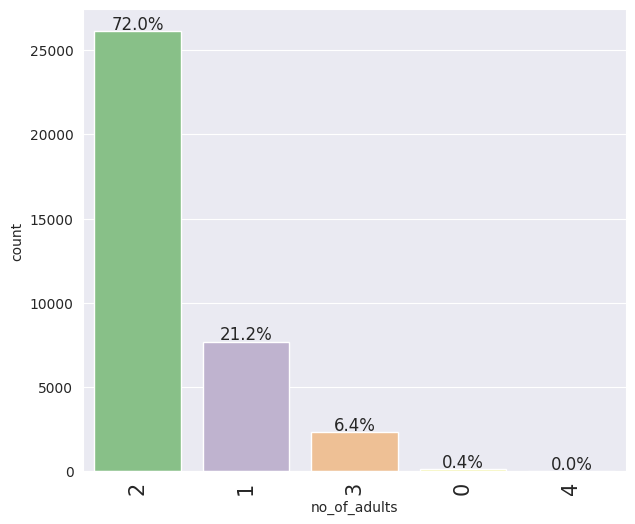

In [201]:
labeled_barplot(df,'no_of_adults', perc=True)

- 72% of the bookings include 2 adults. 
- bookings with just 1 adult are thw 21.2% 
- 3 adults have 6.4% 
- bookings that do not include adults are the 0.4%

#####Number of Children

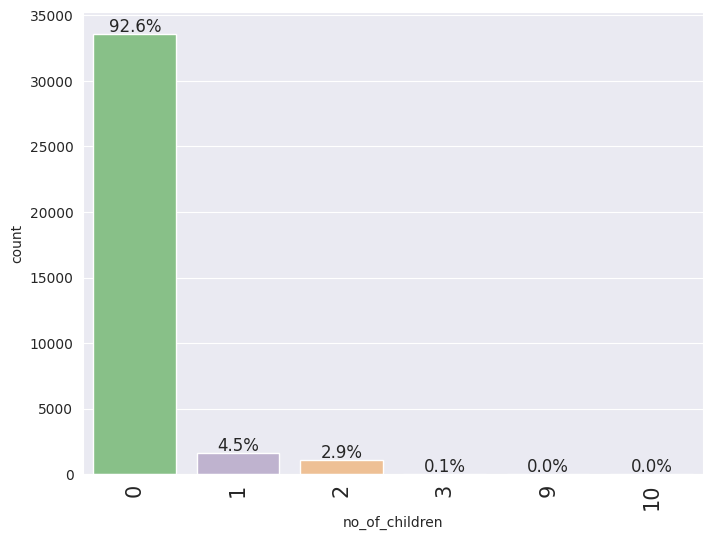

In [202]:
labeled_barplot(df,'no_of_children', perc=True)

In [203]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [204]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

- 92.6% of the bookings do not include any children, following by those that include one children(4.5%) and 2 children(2.9%)

#####Number of weekend nights

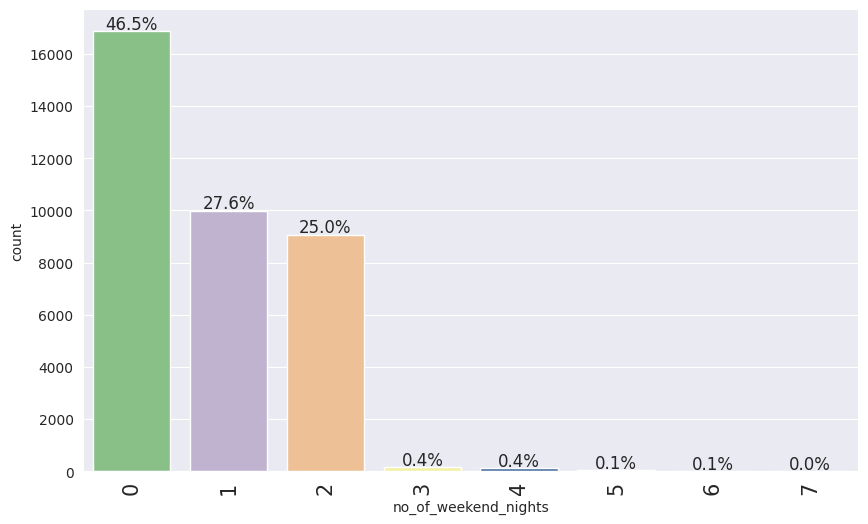

In [205]:
labeled_barplot(df,'no_of_weekend_nights', perc=True)

In [206]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

- 46.5% of the bokings do not included a night during the weekend. Then 1 night during the weekend have the 27.6% and 2 nights 25%.


#####Number of week nights

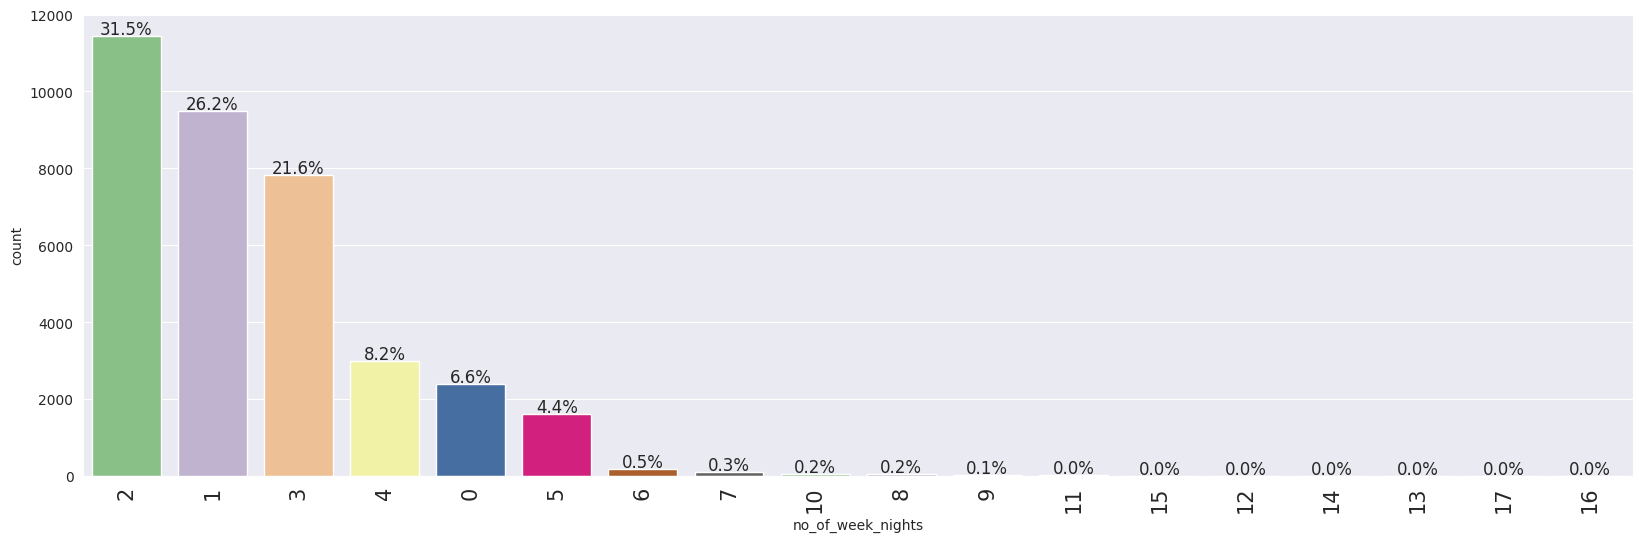

In [207]:
labeled_barplot(df, 'no_of_week_nights', perc=True)

- 31.5% of the booking include two nights during the week.
- 26.2% include 1 nights during the week and 21,6% 3 nights.


In [208]:
df["no_of_week_nights"] = df["no_of_week_nights"].replace([11,15,12,14,13,17,16], 9) #replacing the 0.0 values with 9 value.

##### Meal Plan

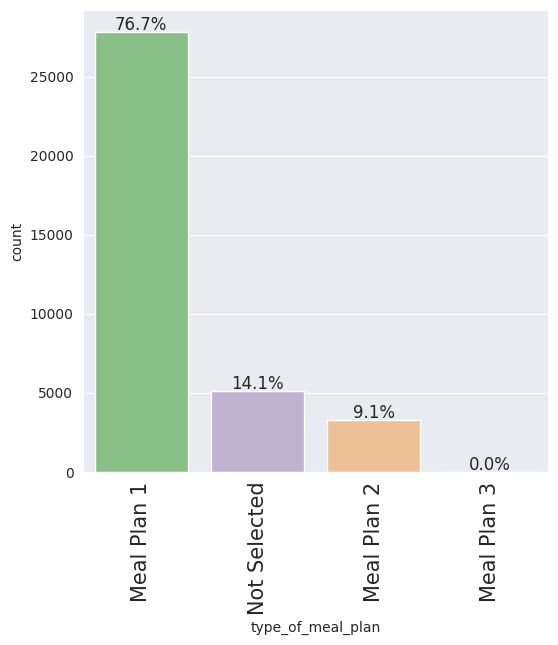

In [209]:
labeled_barplot(df,'type_of_meal_plan', perc=True)

- 76.7% of the bookings have chosen the meal plan 1 that include just breakfast
- 14.1% have chosen the Meal Plan 2, breakfast and one other meal. 

#####Require Parking

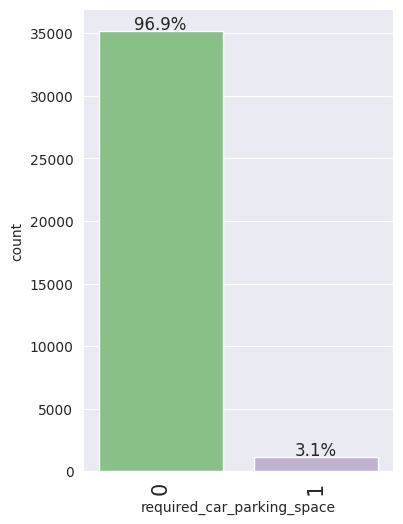

In [210]:
labeled_barplot(df,'required_car_parking_space', perc=True)

In [211]:
df['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

- The visualization shows that approximately 3.1% of the bookings, corresponding to 1124 reservations, required parking. 

#####Type of Room reserved

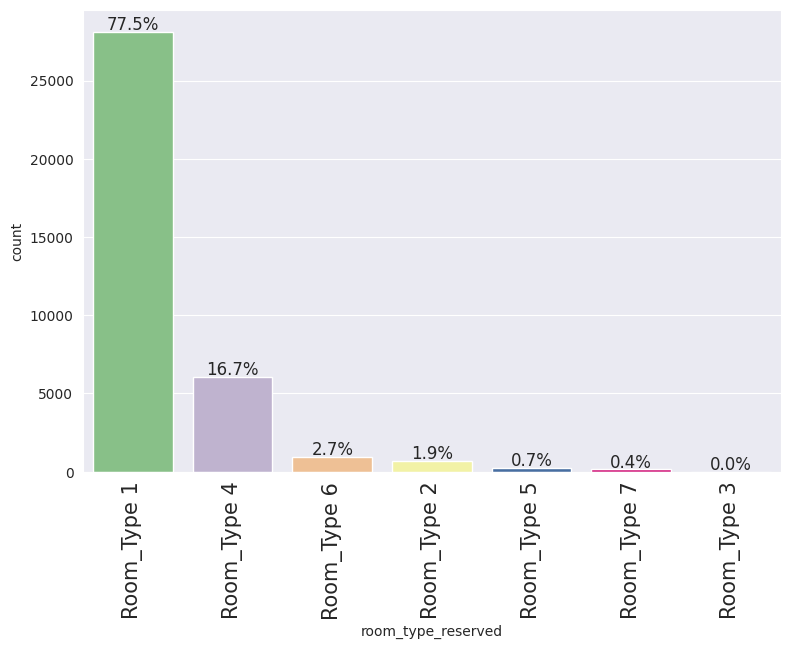

In [212]:
labeled_barplot(df,'room_type_reserved', perc=True)

- Room type 1 is the most popular at 77.5%

In [213]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

- We can see among the bookings Room_Type 1 is being the most preferred(approximately 85% of the total) and Room_Type 3 being the least common, it has just 7 reservations.

#####Lead Time

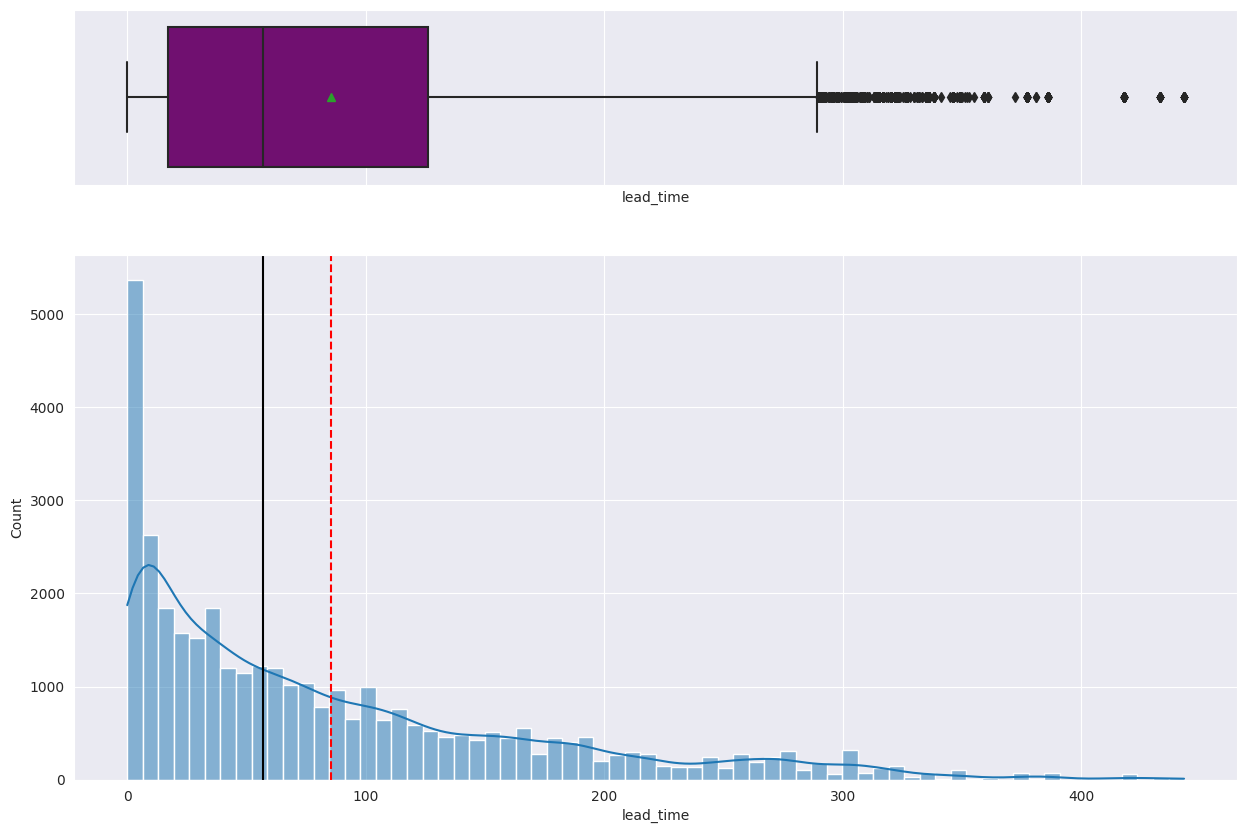

In [214]:
histogram_boxplot(df,'lead_time')

- Distribution is right skewed with outliers towards the high end of the lead day range
- The average of days between the booking and arrival date is 85 days. This suggests that, on average, guests make their reservations about three months in advance of their arrival.
- 75% of the bookings have a lead of 126 or less days, which indicate that the majority of customers make their reservations within four months of their arrival date.

#####Arrival Year

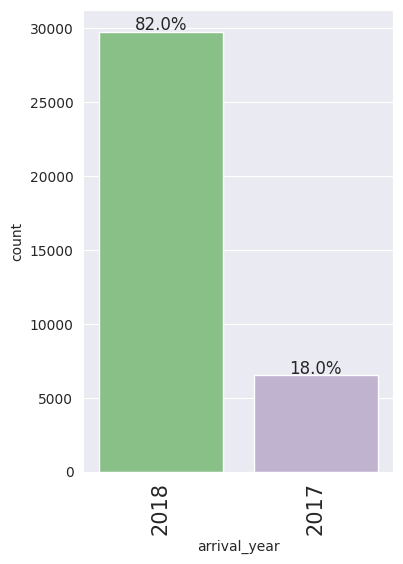

In [215]:
labeled_barplot(df,'arrival_year', perc=True)

- We can see approximately 82% of the bookings are in 2018

#####Arrival Month

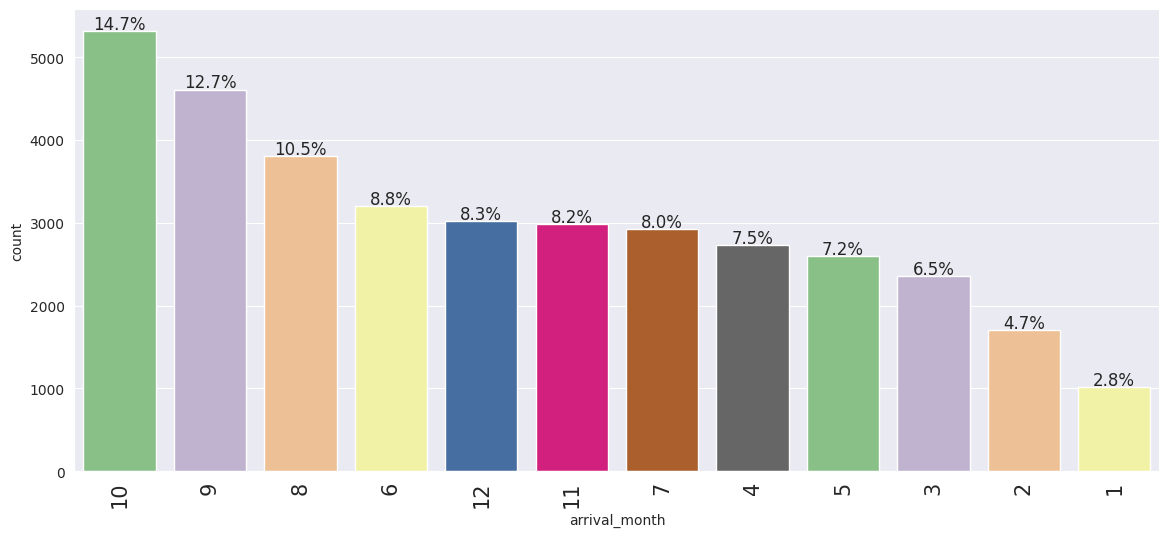

In [216]:
labeled_barplot(df,'arrival_month', perc=True)

In [217]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

- We can see it may be a seasonal pattern in the booking behavior. The number of bookings starts to increase from August(10.5% of the bookings), reaching its peak in October with 14.7% bookings. This period likely corresponds to a popular travel season or event.

- After October, the number of bookings gradually decreases, with November still showing a relatively high number of bookings (8.2%). However, there is a significant decline in December, January, and February, with January having the lowest number of bookings (2.8%). This  may be related to unfavorable weather conditions during the winter season.

#####Arrival Date

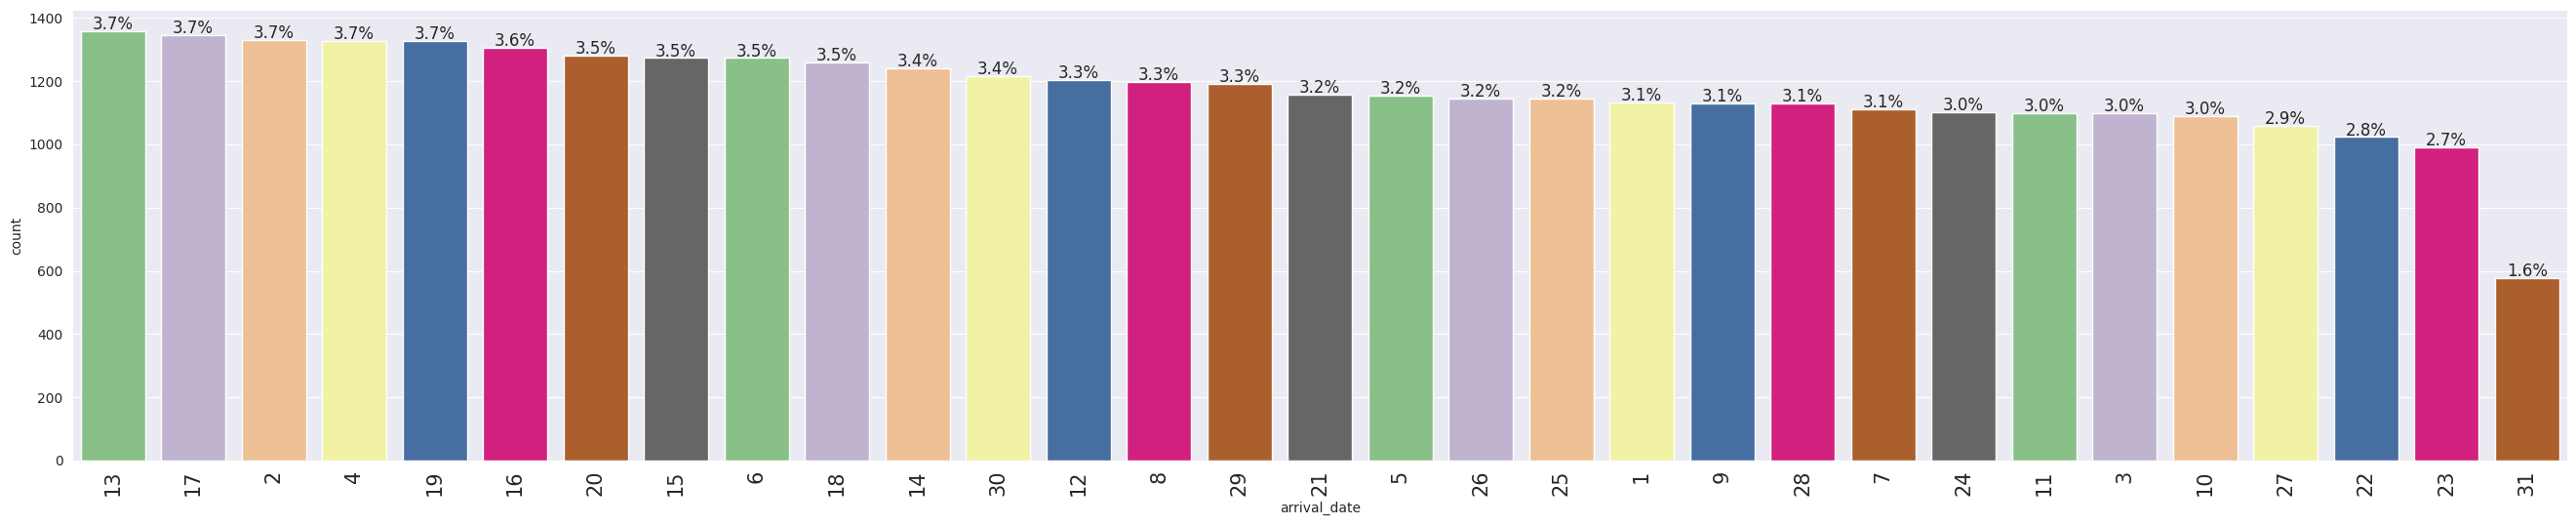

In [218]:
labeled_barplot(df,'arrival_date', perc=True)

In [219]:
df['arrival_date'].value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

- The distribution of arrival days appears to be fairly uniform, with small differences between them. However, it is worth noting that the day 31st has only 1.6% of the total arrivals. This lower percentage could be attributed to the fact that only 7 months in a year have 31 days, affecting the number of arrivals on this day.

- Among the arrival days, the 13th has the highest number of arrivals, 1,358. Following closely behind is the 17th, along with the 2nd, 4th, and 19th, all of which also have a significant number of bookings.

#####Market Segment type

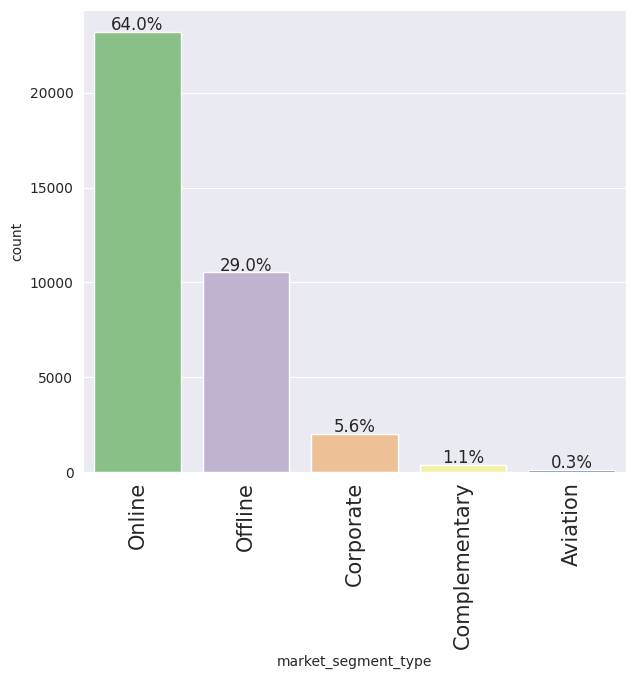

In [220]:
labeled_barplot(df,'market_segment_type', perc=True)

In [221]:
df['market_segment_type'].value_counts(normalize=True).mul(100)

Online          63.99449
Offline         29.02274
Corporate        5.56030
Complementary    1.07788
Aviation         0.34459
Name: market_segment_type, dtype: float64

- The majority of bookings, approximately 63.99%, are made throuth "Online" market segment.

- The second most popular market segment is "Offline," with approximately 29.02% of the bookings. This suggests that a considerable number of bookings were made through offline channels, such as telephone reservations or walk-in bookings.

- The "Corporate" market segment has around 5.56% of the bookings. This indicates that a smaller proportion of bookings were made by corporate clients, possibly for business purposes.

- The "Complementary" market segment has a low representation,(1.08% of the bookings). 

- Aviation market segment has the lowest numbers, with only 0.34% of the bookings. 

#####Repeated Guest

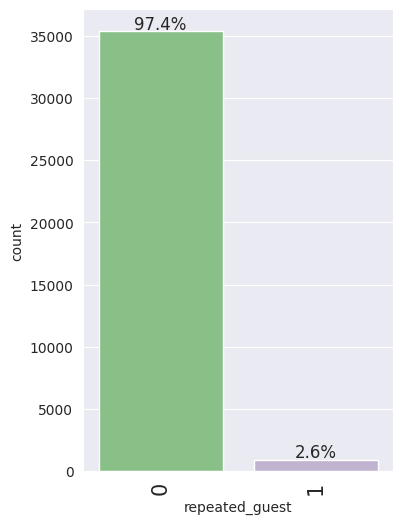

In [222]:
labeled_barplot(df,'repeated_guest', perc=True)

- The majority of customers, approximately 97.44%, have not booked more than once, with 35,345 bookings.

- A small proportion of guests, approximately 2.56%, have booked more than once, representing around 930 bookings. This indicates that a this customers has shown loyalty or preference for the booking platform, hotel, or service.


#####Number of previous cancellations

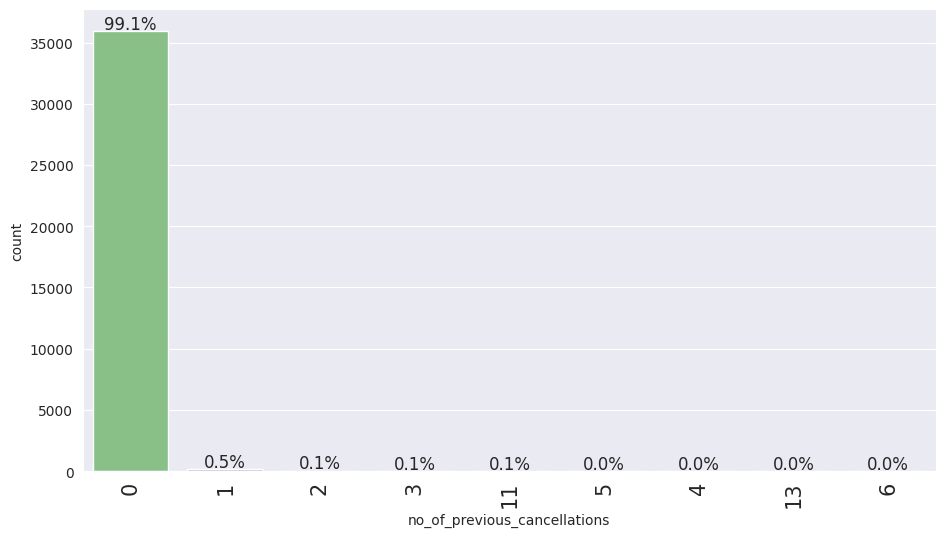

In [223]:
labeled_barplot(df,'no_of_previous_cancellations', perc=True)

In [224]:
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

- The majority of customers have not cancelled a previous booking, approximately 95.2%.

- 198 customers(0.5%) have canceled 1 previous booking. This indicates that some customers have experienced cancellations in their booking history before making the current booking. The counts decrease progressively as the number of previous cancellations increases, with fewer customers having multiple cancellations.

- Approximately 140 guests have canceled more than 2 times. 

#####Number of previous bookings not canceled

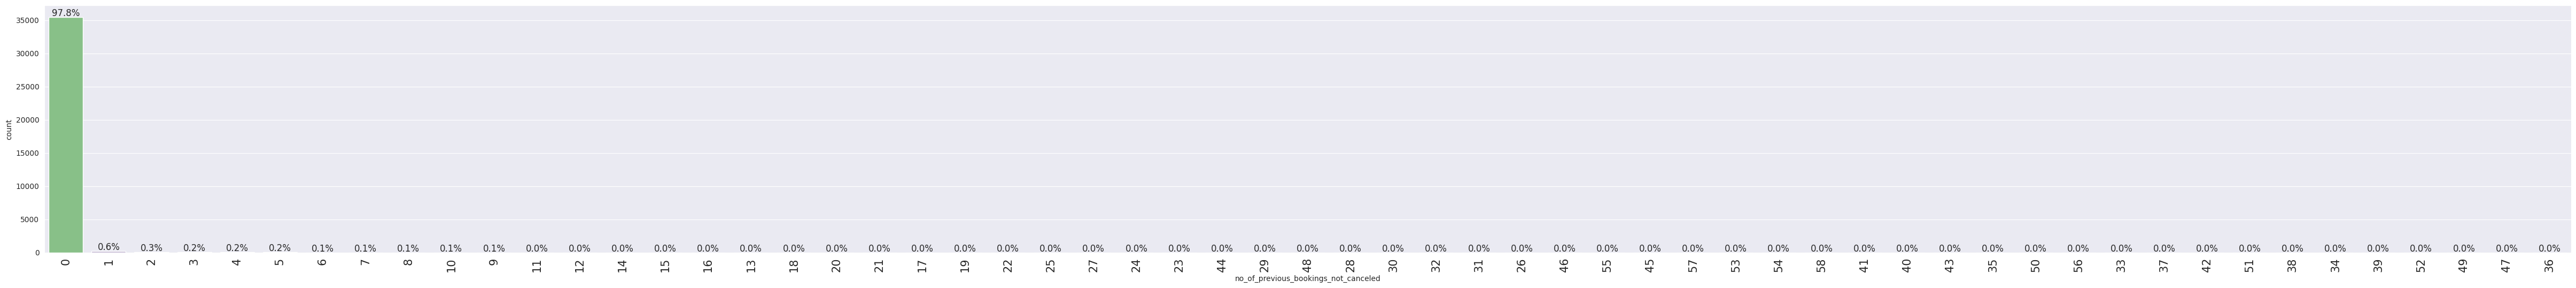

In [225]:
labeled_barplot(df,'no_of_previous_bookings_not_canceled', perc=True)

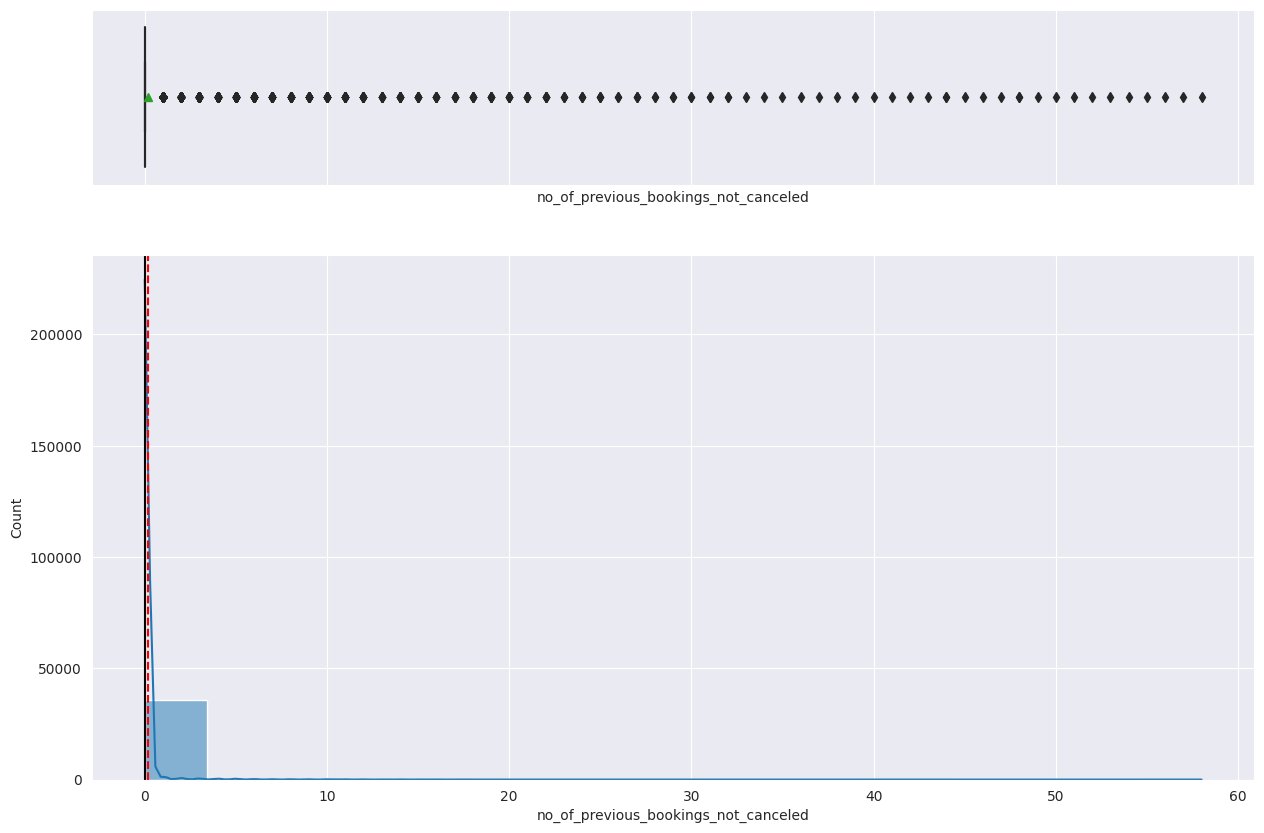

In [226]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

In [227]:
counts = df.no_of_previous_bookings_not_canceled.value_counts()
percs = df.no_of_previous_bookings_not_canceled.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
b=pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])
b[(b['percentage']!='0.0%')]

count percentage
0   35463      97.8%
1     228       0.6%
2     112       0.3%
3      80       0.2%
4      65       0.2%
5      60       0.2%
6      36       0.1%
7      24       0.1%
8      23       0.1%
10     19       0.1%
9      19       0.1%

- It appears that the majority of bookings (97.8%) have no previous bookings to be cancelled.
- The other 2.2% suggests that some customers have a track record of making and keeping their bookings without canceling them.

#####Average price per room

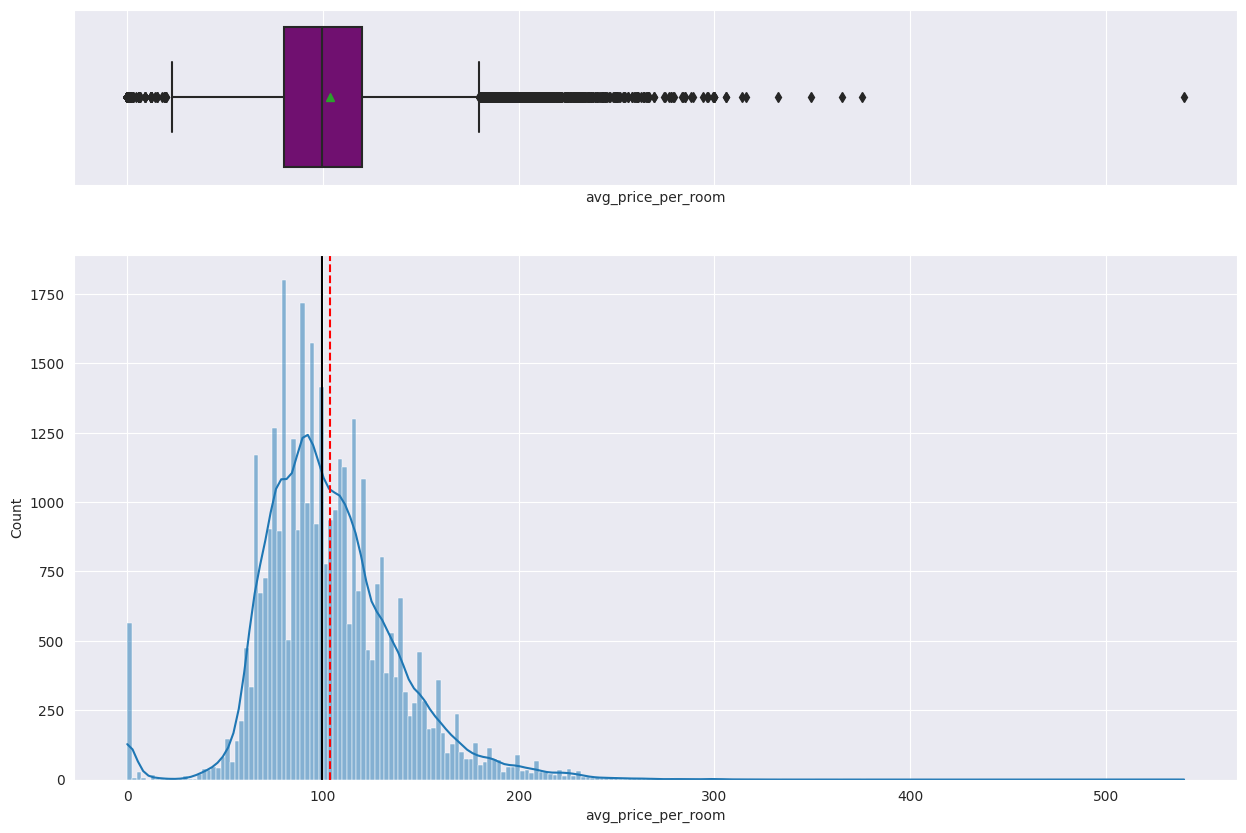

In [228]:
histogram_boxplot(df,'avg_price_per_room')

In [229]:
df['avg_price_per_room'].describe()

count   36275.00000
mean      103.42354
std        35.08942
min         0.00000
25%        80.30000
50%        99.45000
75%       120.00000
max       540.00000
Name: avg_price_per_room, dtype: float64

- Distribution is right skewed, majority of the prices are concentrated towards the lower values and a few bookings with extreme prices. 


#####Number of Soecial Requests

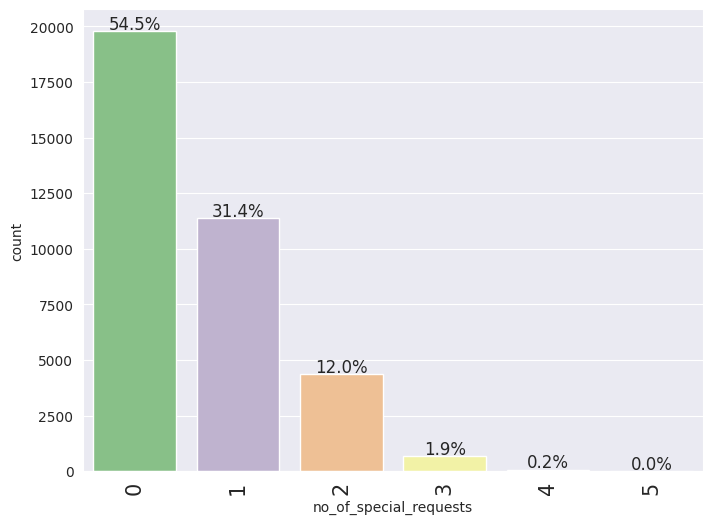

In [230]:
labeled_barplot(df,'no_of_special_requests', perc=True)

#####Booking Status

In [231]:
df['booking_status'] = df["booking_status"].apply(lambda x: 0 if x =='Not_Canceled' else 1) #converting canceled in 1 y not canceled in 0

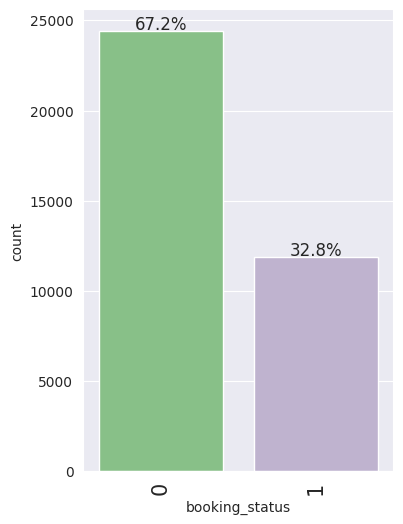

In [232]:
labeled_barplot(df,'booking_status', perc=True)

In [233]:
df['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

 - We have 32.8% of the bookings canceled and 67.2% of the bookings, not canceled.

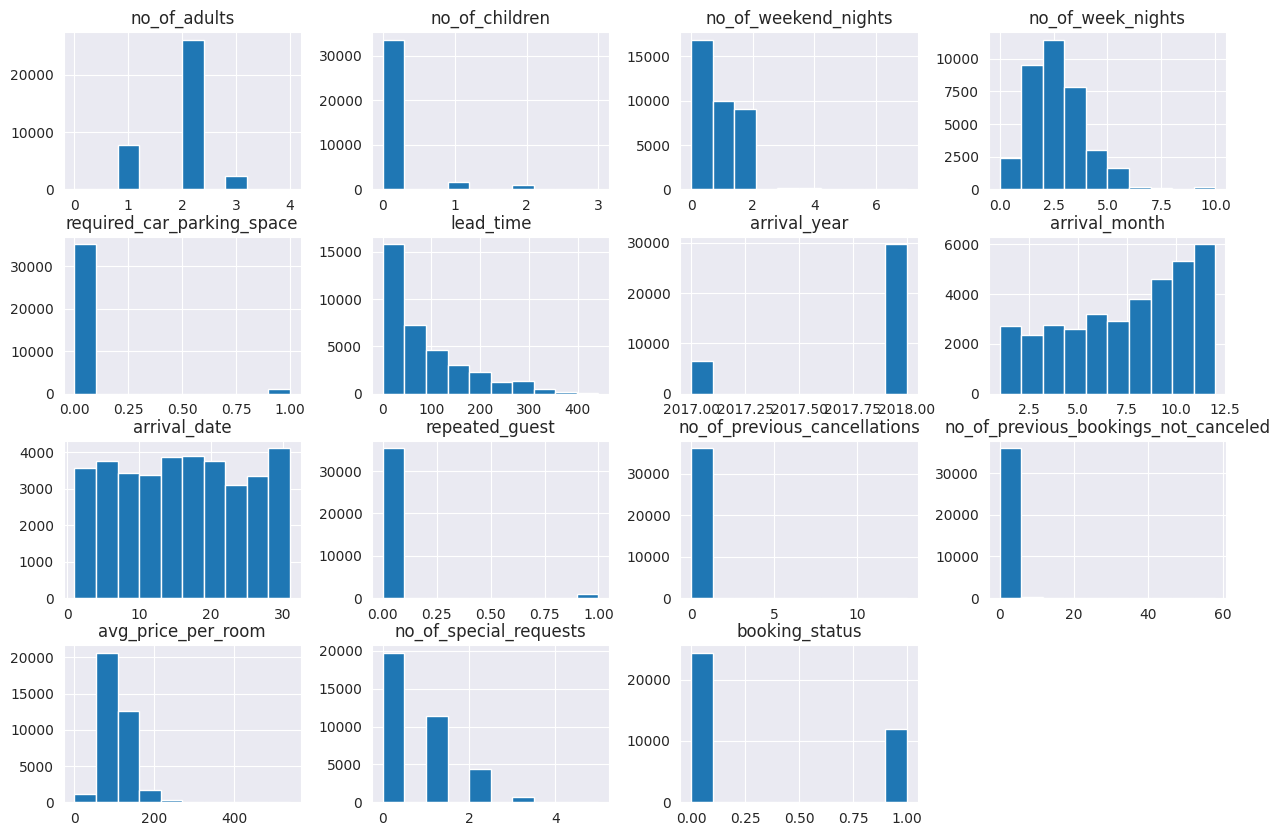

In [234]:
sns.set_style("darkgrid")
df.hist(figsize=(15, 10))
plt.show()

##Bivariate Analysis

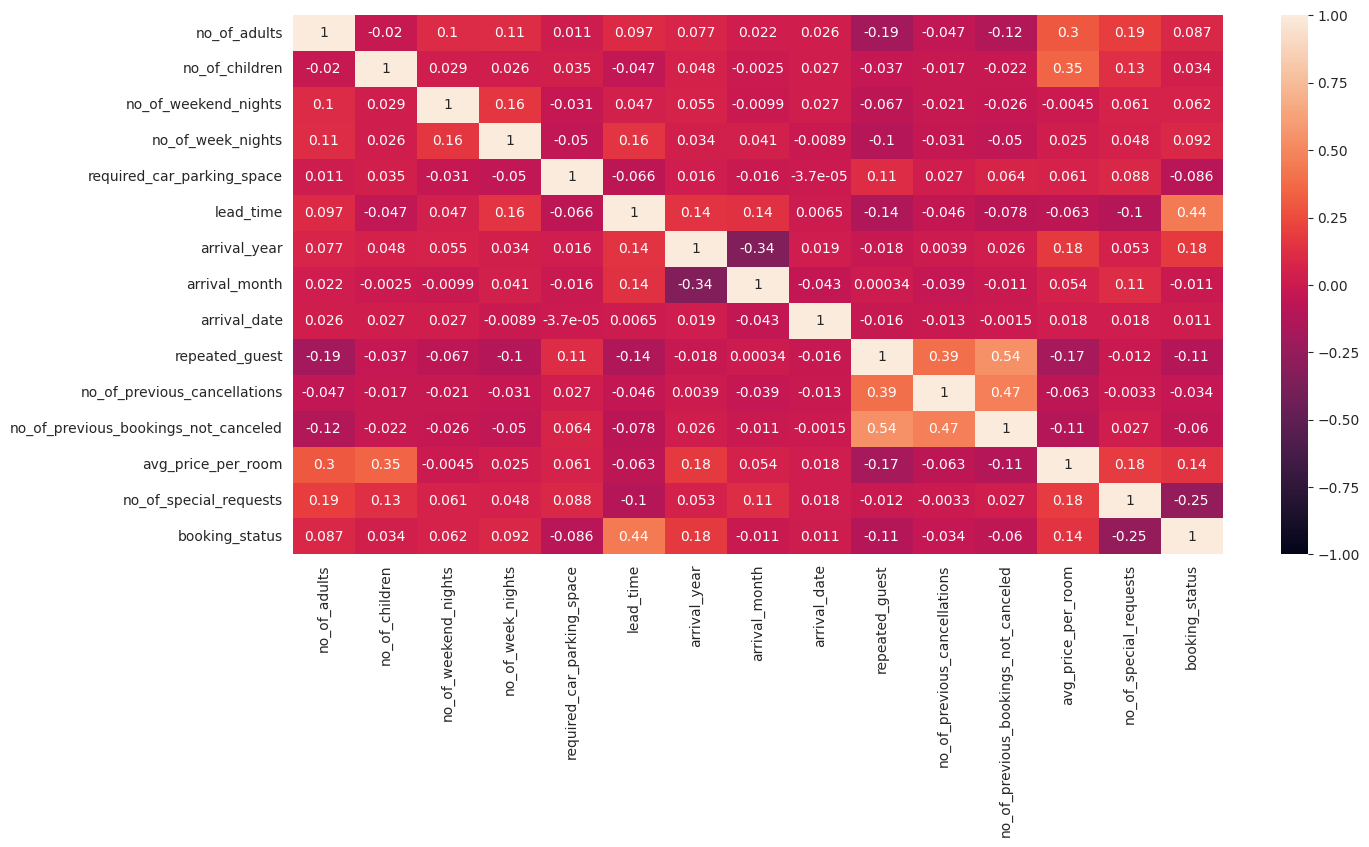

In [396]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

- "no_of_adults" and "avg_price_per_room" have a moderate positive correlation of approximately 0.30. This suggests that as the number of adults increases, the average price per room also tends to increase.

- "no_of_children" and "avg_price_per_room" have a similar moderate positive correlation of around 0.35. This implies that bookings with a higher number of children may be associated with higher average room prices.

- "no_of_weekend_nights" and "no_of_week_nights" have positive correlations with both "avg_price_per_room" and "lead_time." This suggests that longer stays (weekend nights and week nights) and bookings made further in advance may be associated with higher average room prices.

- "required_car_parking_space" has a small negative correlation with "avg_price_per_room," indicating that bookings with a higher required car parking space may be associated with slightly lower average room prices.

- "lead_time" has a moderate positive correlation with "avg_price_per_room" (approximately 0.44). This indicates that bookings made further in advance tend to have higher average room prices.

- "repeated_guest" shows a negative correlation with "no_of_adults," "no_of_children," and "no_of_special_requests." This suggests that repeated guests tend to have fewer adults, fewer children, and fewer special requests compared to first-time guests.

- "booking_status" has a weak positive correlation with "lead_time" and "avg_price_per_room." This implies that bookings with longer lead times and higher average room prices may have a slightly higher chance of being canceled.

- It's important to note that correlation does not imply causation. 

In [391]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="blue",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Accent",
    )

    plt.tight_layout()
    plt.show()

In [392]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

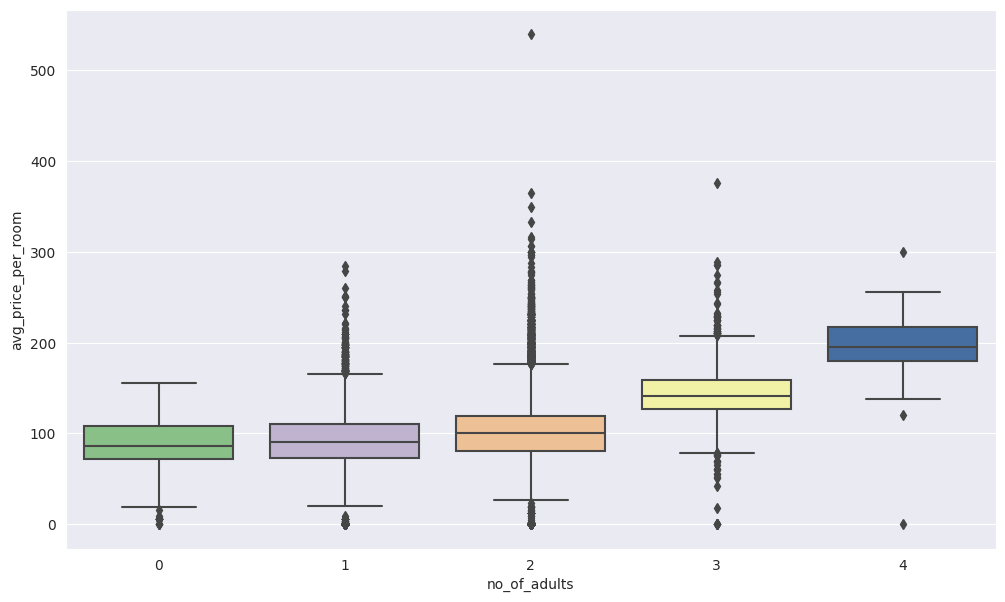

In [359]:
plt.figure(figsize=(12, 7))
sns.set_palette("Accent")
sns.boxplot(data=df, x="no_of_adults", y="avg_price_per_room")
plt.show()

- As we saw in the heat map, there seems to be a correlation between the number of adults and the prices per room, as the prices per room tend to increase when the number of adults increases.

Booking's family members vs Booking status

In [360]:
family = df[(df["no_of_children"] >=0) & (df["no_of_adults"] >1)]
family.shape

(28441, 18)

In [361]:
family["no_family_members"] = (
    family["no_of_adults"] + family["no_of_children"])

booking_status         0     1    All
no_family_members                    
All                18456  9985  28441
2                  15506  8213  23719
3                   2425  1368   3793
4                    514   398    912
5                     11     6     17
------------------------------------------------------------------------------------------------------------------------


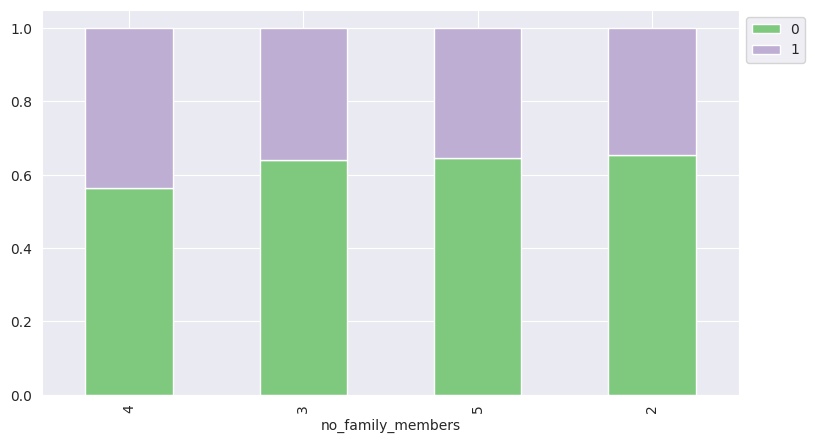

In [362]:
stacked_barplot(family,"no_family_members","booking_status" ) 

- Among all family bookings, with more than one adult in the room, 18456 bookings have not being canceled, and 9985 bookings have being canceled.

Repeated Guest vs Booking Status

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


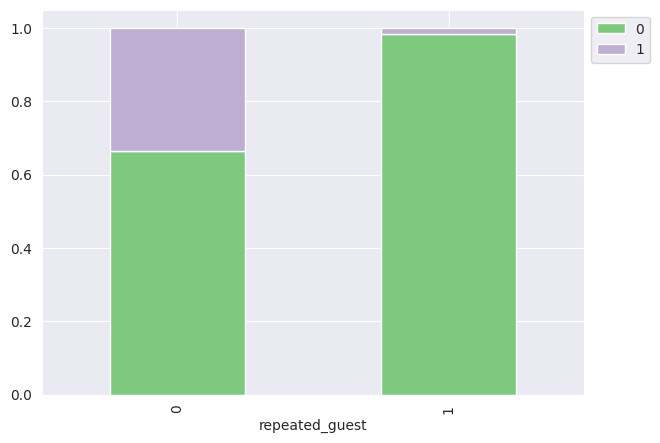

In [363]:
stacked_barplot(df,"repeated_guest","booking_status" ) 

- Among bookings with repeated guests:
    - 98.3% of reservations were not canceled (914)
    - 1.7% of reservations were canceled (16)

- Among bookings with no repeated guests:
    - 66.5% of reservations were not canceled (23476).
    - 33.5% of reservations were canceled (11869).

Market segment type vs Average price per room

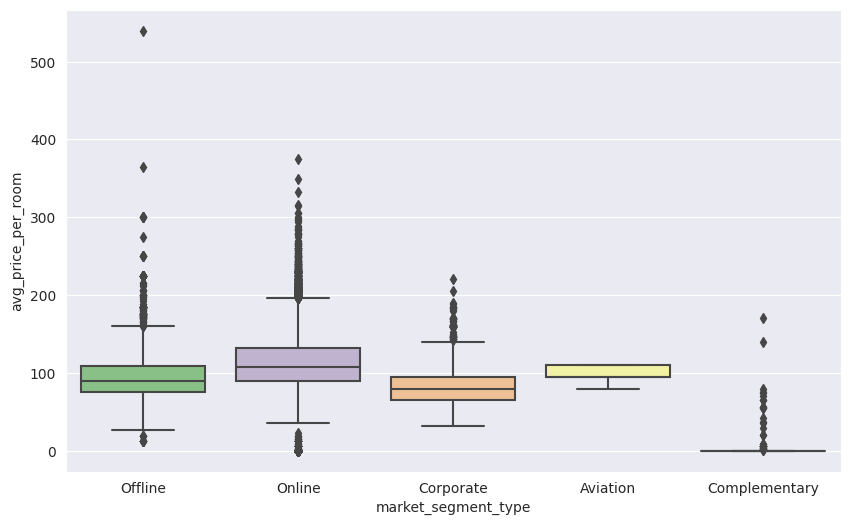

In [364]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room")
plt.show()

- Online market appears to have the highest prices with an average of 113 euros, and the largest spread price with a minimum 0.5 and maximum of 375 euros. Having 75% of the bookings under 132 euros. 


booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


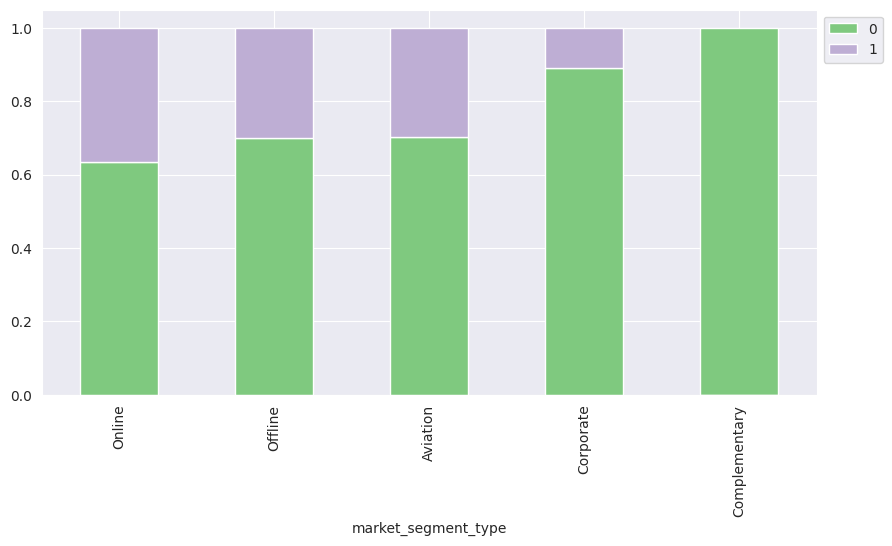

In [365]:
stacked_barplot(df, "market_segment_type", "booking_status")

- Among the bookings in the DataFrame, there are 23,214 bookings from the "Online" market segment. Out of these, 14,739 reservations haven't been canceled, while 8,475 bookings have been canceled.
- For the "Offline" market segment, out of 10,528 bookings, 7,375 reservations haven't been canceled, and 3,153 bookings have been canceled. 
- Corporate" market segment, out of 2,017 bookings, 1,797 reservations haven't been canceled, and 220 bookings have been canceled. 
- In the "Aviation" market segment, out of 125 bookings, 88 reservations haven't been canceled, and 37 bookings have been canceled. 
- For the "Complementary" market segment, all 391 bookings haven't been canceled.

Total days vs Booking status

In [366]:
days_stay = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)] #filtering per no of night >0
days_stay.shape

(17094, 18)

In [367]:
days_stay["total_days"] = (days_stay["no_of_week_nights"] + days_stay["no_of_weekend_nights"]) #creating new column

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  8    40     48
15                  6    32     38
13                  7    27     34
11                 24    15     39
12                  9    15     24
16                  0     1      1
------------------------------------------------------------------------------------------------------------------------


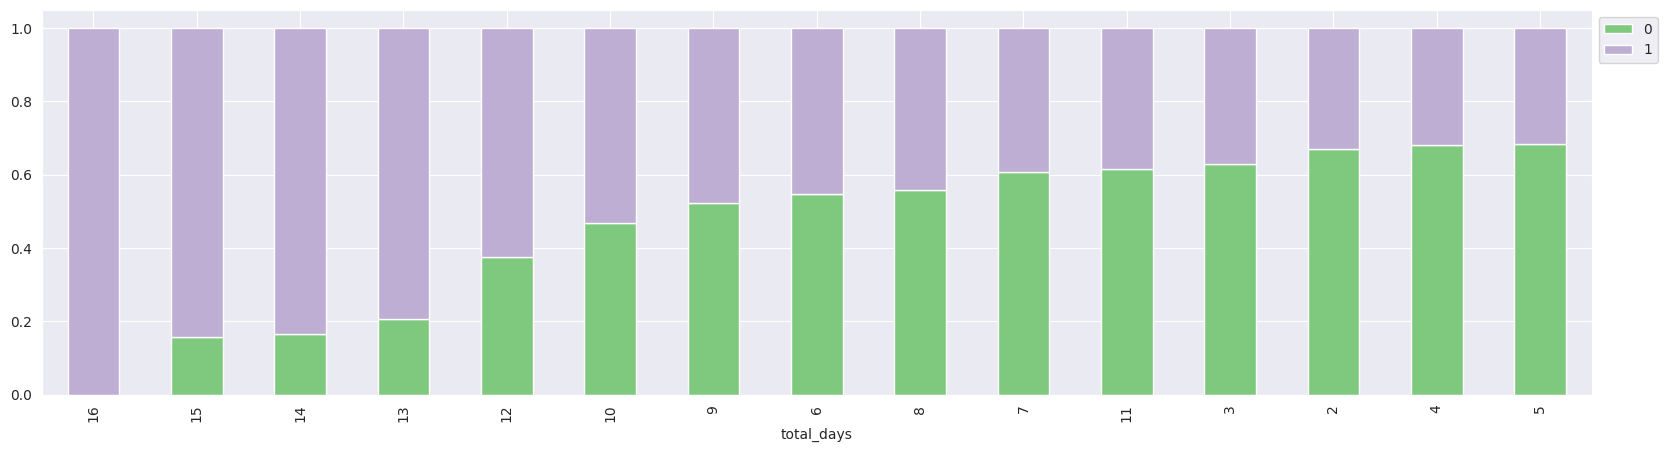

In [368]:
stacked_barplot(days_stay,"total_days","booking_status") 

- The majority of bookings (10979) was 3 days.
- The second most common duration was 4 days, with 4,364 bookings.
- Bookings for were 5 days 2331, while 2189 bookings were for 2 days.

Special requests vs Booking status

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


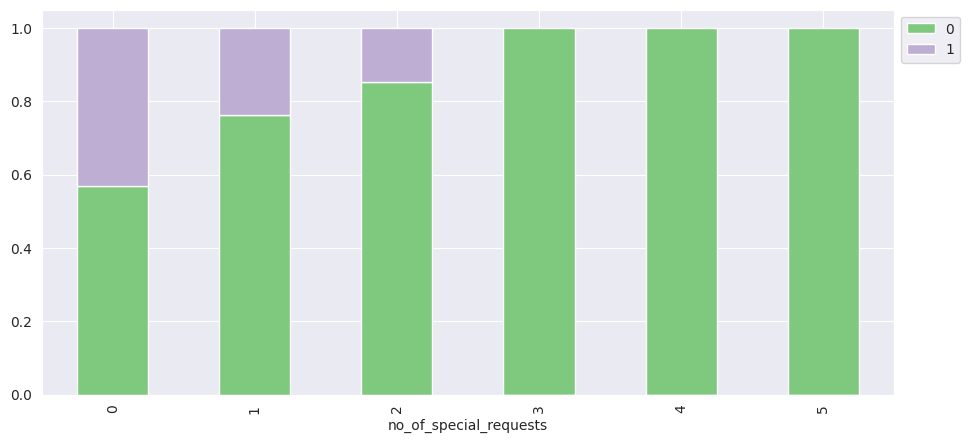

In [369]:
stacked_barplot(df, "no_of_special_requests", "booking_status")



- The distribution of cancellations and non-cancellations based on the number of special requests were 11885 bookings canceled and 24390 bookings that were not canceled, resulting in a total of 36,275 bookings.

- About bookings with no special requests: 
  - 8545 were canceled (43.22% of total bookings) and 11,232 were not canceled (56.78% of total bookings), That is a total of 19,777 bookings.

- Bookings with 1 special request: 2703 cancellations (23.79% of total bookings) and 8670 non cancellations (76.21% of total bookings), with a total of 11373 bookings.

- For bookings with 2 special requests: There were 637 cancellations (14.61% of total bookings) and 3,727 non cancellations (85.39% of total bookings), with a total of 4364 bookings.

- There were no cancellations for bookings with 3, 4, or 5 special requests. The respective numbers of non-cancellations were 675, 78, and 8, accounting for 100% of bookings in each category.

- It seems as the number of special requests increases, the proportion of cancellations tends to decrease. This suggests that guests who make more special requests are less likely to cancel their bookings.

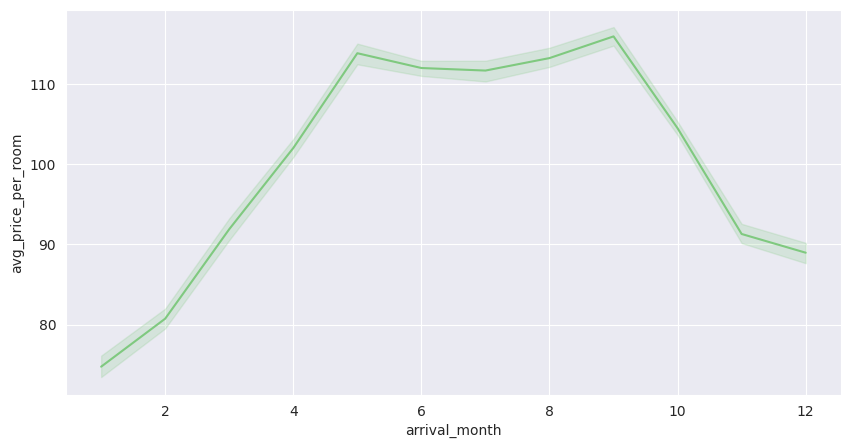

In [370]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = data,x="arrival_month",y="avg_price_per_room") 
plt.show()

In [371]:
price=df[(df['avg_price_per_room'])==0]
price.shape

(545, 18)

In [372]:
price['booking_status'].value_counts()

0    539
1      6
Name: booking_status, dtype: int64

In [373]:
price.head(3)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63              1               0                     0                  1   
145             1               0                     0                  2   
209             1               0                     0                  0   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
63        Meal Plan 1                           0        Room_Type 1   
145       Meal Plan 1                           0        Room_Type 1   
209       Meal Plan 1                           0        Room_Type 1   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
63           2          2017              9            10       Complementary   
145         13          2018              6             1       Complementary   
209          4          2018              2            27       Complementary   

     repeated_guest  no_of_previous_cancellations  \
63                0                             0   
145               1                             3   
209               0                             0   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                      0             0.00000   
145                                     5             0.00000   
209                                     0             0.00000   

     no_of_special_requests  booking_status  
63                        1               0  
145                       1               0  
209                       1               0

In [374]:
price['market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

In [375]:
price["no_of_children"].value_counts()

0    510
1     21
2     12
3      2
Name: no_of_children, dtype: int64

- There are 545 bookings with price 0
- From those just 6 are cancelled


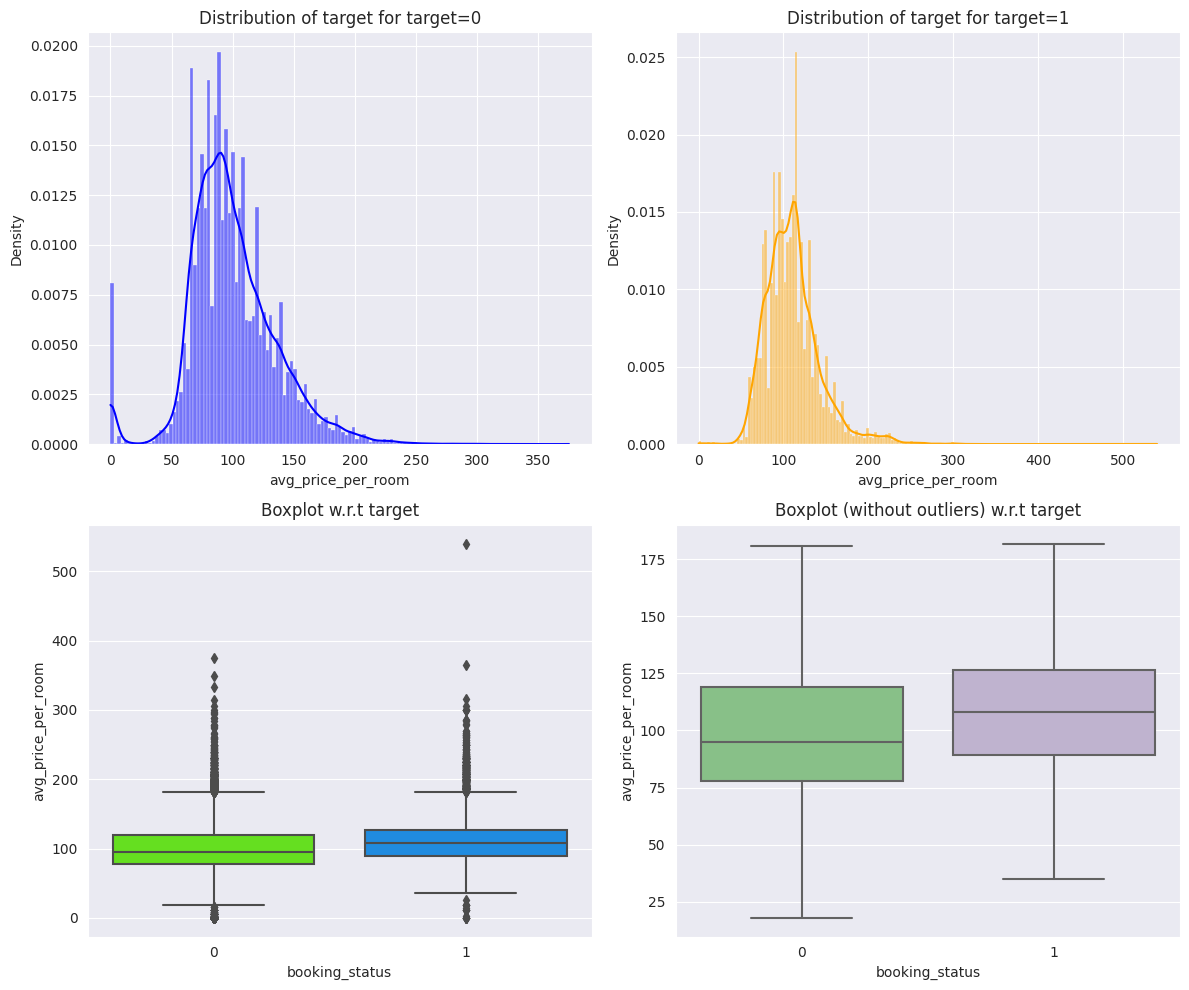

In [393]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")


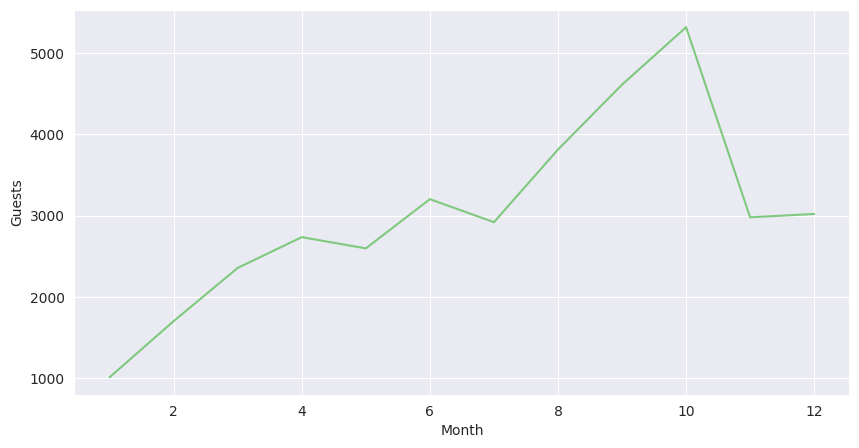

In [377]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

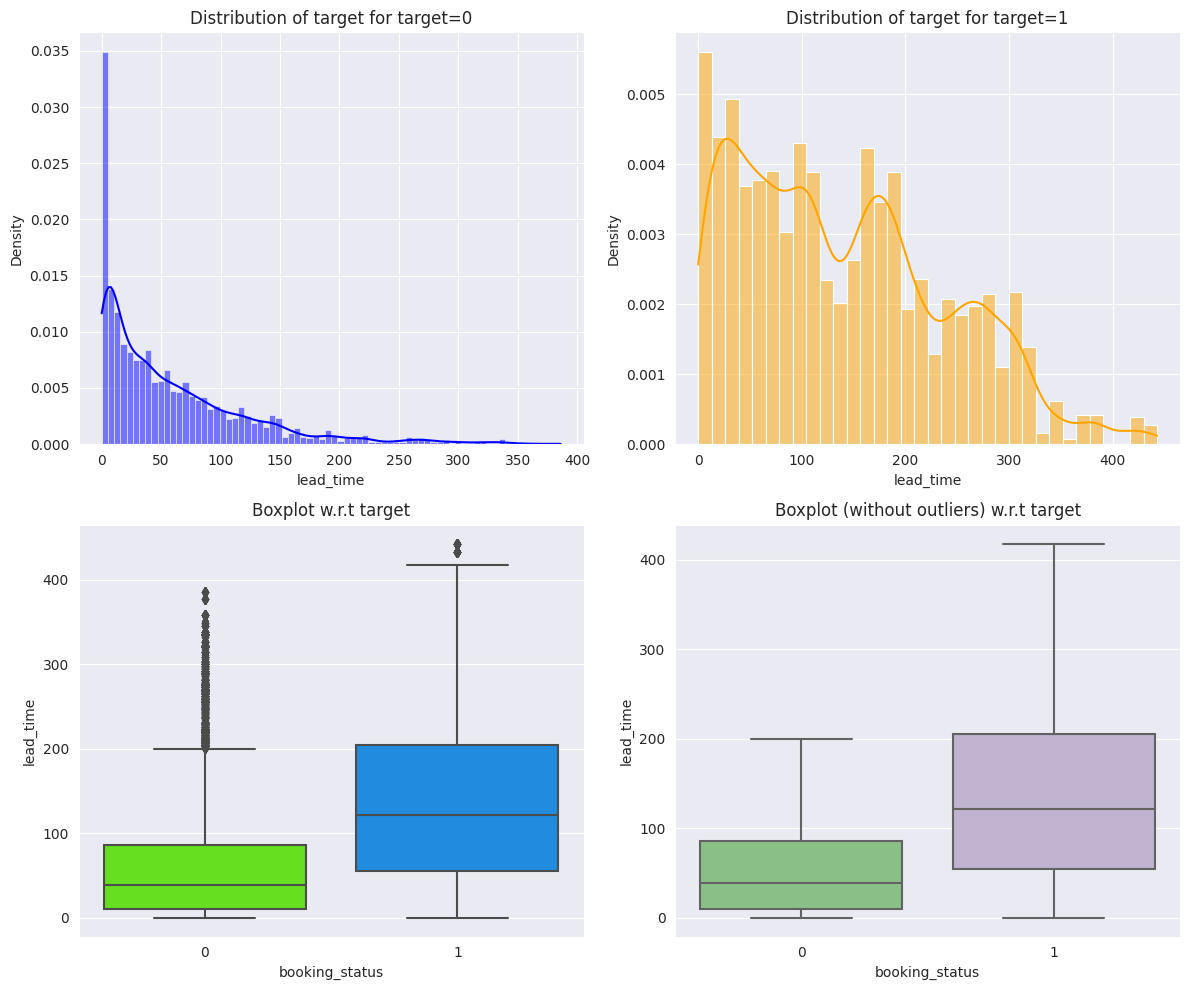

In [394]:
## Plot distribution of lead time wrt booking status
distribution_plot_wrt_target(df, 'lead_time',"booking_status") 

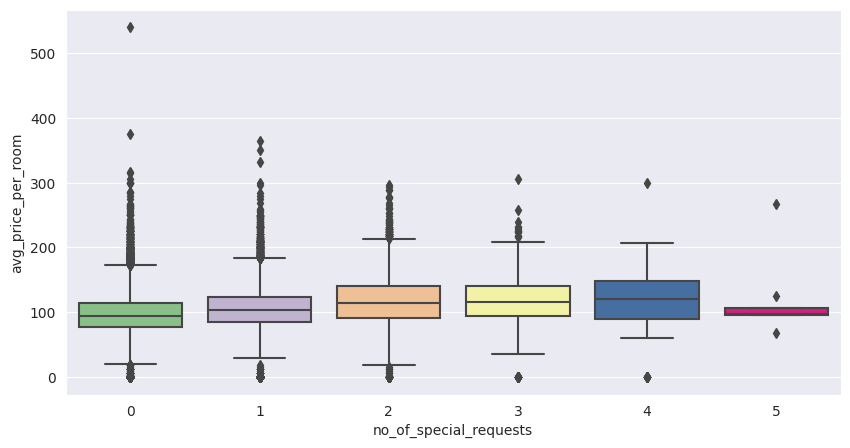

In [379]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = "no_of_special_requests", y = "avg_price_per_room")  ## Complete the code to create boxplot for no of special requests and average price per room (excluding the outliers)
plt.show()

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


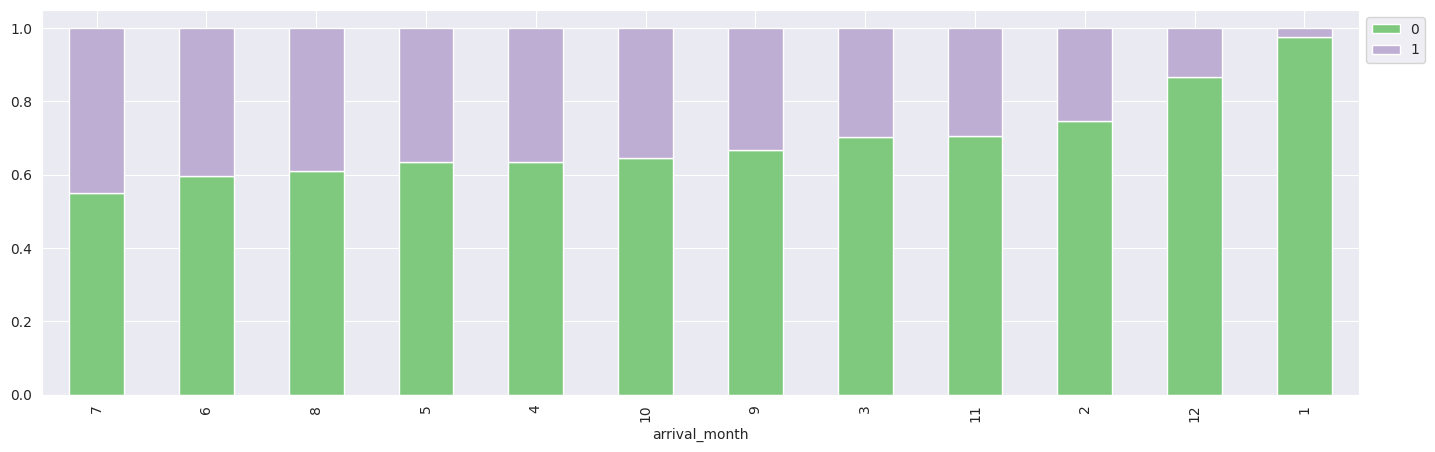

In [380]:
 ## Plot stacked barplot for arrival month and booking status
stacked_barplot(df,'arrival_month','booking_status')

**Leading Questions**:
1. What are the busiest months in the hotel?
   - The busiest months in the hotel are October, September, and August.
     - October with approximately 14.7% of the total bookings, is the busiest month.
     - September follows closely with 12.7% of the bookings and August comes next with 10.5% of the bookings. These months experience higher demand and occupancy rates, likely due to various factors such as holidays, seasonal events, or favorable weather conditions. The hotel may need to plan accordingly and ensure sufficient resources and staffing during these peak months to provide a satisfactory experience for guests.
    
2. Which market segment do most of the guests come from?


   - The majority of guests come from the online market segment. This market segment has approximately 64% of the total guests. It indicates that a significant number of bookings are made through online channels such as hotel booking websites, online travel agencies, or direct online reservations. The online market segment is followed by offline sources, which has about 29% of the total guests. These offline sources may include direct bookings through phone calls, walk-ins, or bookings made through traditional travel agencies. From this we can see a clear dominant market segment, which could help the hotel focus on marketing strategies and efforts on channels that generate the most bookings.


3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
 - The room prices vary across different market segments. The online market segment appears to have the highest prices, indicating that bookings made through online channels tend to have higher rates compared to other segments. This could be attributed to various factors such as the convenience of online plattaforms.

 - On the other hand, the offline market segment tends to have relatively lower room prices compared to the online segment. This might be because offline bookings may involve direct negotiation with the hotel or traditional travel agencies, which could result in lower negotiated rates or special discounts.


 - It's important to note that the differences in room prices among market segments can also be influenced by factors like customer demographics, booking patterns, and demand fluctuations. Therefore, the hotel should always adjust its pricing strategy to optimize revenue based on market dynamics and customer preferences for each market segment.


4. What percentage of bookings are canceled?
   - We have 32.8% of the bookings canceled


5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?


   - From repeating guests approximately 2.6% of them have made repeated bookings, which is around 930 bookings. Out of these 930 bookings, only 16 reservations have been canceled, resulting in 1.7%. This indicates that the majority of repeating guests has a high level of commitment, as they rarely cancel their bookings.


6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?


- As the number of special requests increases, the proportion of cancellations tends to decrease. This suggests that guests who make more special requests are less likely to cancel their bookings.


   - Regarding bookings with no special requests, 43.22% were canceled.
   - For bookings with 1 special request, the cancellation rate decreased to 23.79%.
   - Bookings with 2 special requests had a lower cancellation rate of 14.61%.
   - Bookings with 3, 4, or 5 special requests had no cancellations at all.
   - This trend suggests that when guests have specific preferences or special requirements, they tend to be more committed to their bookings and less likely to cancel.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [381]:
df.isnull().sum() #Checking again the columns with missing values

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

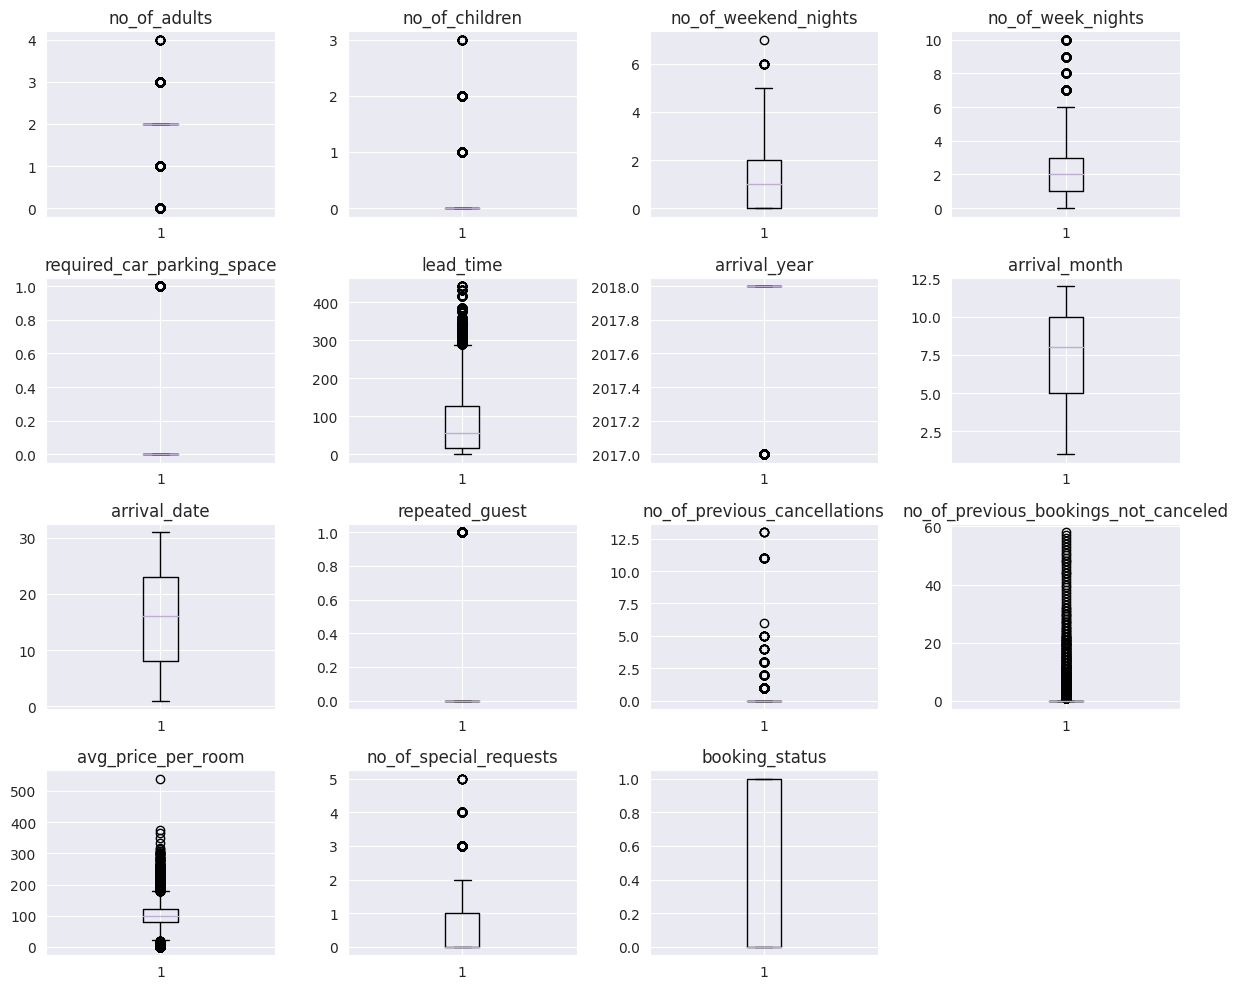

In [382]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable


plt.figure(figsize=(12, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We have decided to include the outliers in our analysis because they contain valuable information. They can provide unique insights and contribute to a more comprehensive understanding of the data

## Building a Logistic Regression model

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.


Let's create functions to check the performance of our model.

In [383]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [384]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [385]:
X = df.drop(["booking_status"], axis=1) # specifying the independent  and dependent variables
y = df["booking_status"]

In [386]:
X = sm.add_constant(X) # adding a constant to the independent variables

In [387]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,) # creating dummy variables

In [388]:
X.shape #checking No of rows and columns 

(36275, 28)

In [389]:
X = X.astype(float) #Making sure are data is in type float

X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000       2.00000         0.00000               1.00000   
1 1.00000       2.00000         0.00000               2.00000   
2 1.00000       1.00000         0.00000               2.00000   
3 1.00000       2.00000         0.00000               0.00000   
4 1.00000       2.00000         0.00000               1.00000   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0            2.00000                     0.00000  224.00000    2017.00000   
1            3.00000                     0.00000    5.00000    2018.00000   
2            1.00000                     0.00000    1.00000    2018.00000   
3            2.00000                     0.00000  211.00000    2018.00000   
4            1.00000                     0.00000   48.00000    2018.00000   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0       10.00000       2.00000         0.00000                       0.00000   
1       11.00000       6.00000         0.00000                       0.00000   
2        2.00000      28.00000         0.00000                       0.00000   
3        5.00000      20.00000         0.00000                       0.00000   
4        4.00000      11.00000         0.00000                       0.00000   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                               0.00000            65.00000   
1                               0.00000           106.68000   
2                               0.00000            60.00000   
3                               0.00000           100.00000   
4                               0.00000            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                 0.00000                        0.00000   
1                 1.00000                        0.00000   
2                 0.00000                        0.00000   
3                 0.00000                        0.00000   
4                 0.00000                        0.00000   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                        0.00000                         0.00000   
1                        0.00000                         1.00000   
2                        0.00000                         0.00000   
3                        0.00000                         0.00000   
4                        0.00000                         1.00000   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                            0.00000                        0.00000   
1                            0.00000                        0.00000   
2                            0.00000                        0.

In [390]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  float64
 2   no_of_children                        36275 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  float64
 4   no_of_week_nights                     36275 non-null  float64
 5   required_car_parking_space            36275 non-null  float64
 6   lead_time                             36275 non-null  float64
 7   arrival_year                          36275 non-null  float64
 8   arrival_month                         36275 non-null  float64
 9   arrival_date                          36275 non-null  float64
 10  repeated_guest                        36275 non-null  float64
 11  no_of_previous_

In [270]:
# splitting data in train(70%) and test(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [271]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Number of rows in train data = 25392
Number of rows in test data = 10883
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## Fitting the Logistic Regression Model

In [272]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3292
Time:                        15:15:04   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.5197    120.845     -7.642      0.000   -1160.372    -686.668
no_of_adults                             0.1131      

**Observations**

- Negative values of the coefficient show that the probability of a booking cancelation decreases with the increase of the corresponding attribute value.
 
- Positive values of the coefficient show that the probability of a booking cancelation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [273]:
print("Training performance model 1:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance model 1:


Accuracy  Recall  Precision      F1
0   0.80561 0.63315    0.73922 0.68208

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [274]:
#Checking for multicollinearity using VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
vif_before = calculate_vif(X_train)
print("VIF before removing variables:\n", vif_before)

VIF before removing variables:
                                 Features            VIF
0                                  const 39474269.99028
1                           no_of_adults        1.35134
2                         no_of_children        2.09335
3                   no_of_weekend_nights        1.06458
4                      no_of_week_nights        1.09495
5             required_car_parking_space        1.03998
6                              lead_time        1.39609
7                           arrival_year        1.43105
8                          arrival_month        1.27573
9                           arrival_date        1.00680
10                        repeated_guest        1.78351
11          no_of_previous_cancellations        1.39570
12  no_of_previous_bookings_not_canceled        1.65202
13                    avg_price_per_room        2.05535
14                no_of_special_requests        1.24802
15         type_of_meal_plan_Meal Plan 2        1.27212
16         type_

In [275]:
vif_before = calculate_vif(X_train)[calculate_vif(X_train)["VIF"] > 5]
vif_before

Features            VIF
0                           const 39474269.99028
25  market_segment_type_Corporate       16.93057
26    market_segment_type_Offline       64.11873
27     market_segment_type_Online       71.18278

In [276]:
col_drop = "market_segment_type_Online" #dropping the column with highest VIF
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_drop)]

# Checking VIF after dropping
vif_after = calculate_vif(X_train1)
print("VIF after dropping ", col_drop)
vif_after

VIF after dropping  market_segment_type_Online


Features            VIF
0                                  const 39397141.17425
1                           no_of_adults        1.33483
2                         no_of_children        2.09231
3                   no_of_weekend_nights        1.06413
4                      no_of_week_nights        1.09435
5             required_car_parking_space        1.03985
6                              lead_time        1.39178
7                           arrival_year        1.42859
8                          arrival_month        1.27468
9                           arrival_date        1.00678
10                        repeated_guest        1.78018
11          no_of_previous_cancellations        1.39546
12  no_of_previous_bookings_not_canceled        1.65178
13                    avg_price_per_room        2.05455
14                no_of_special_requests        1.24318
15         type_of_meal_plan_Meal Plan 2        1.27176
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27155
18        room_type_reserved_Room_Type 2        1.10571
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.35719
21        room_type_reserved_Room_Type 5        1.02786
22        room_type_reserved_Room_Type 6        2.05402
23        room_type_reserved_Room_Type 7        1.11758
24     market_segment_type_Complementary        1.33879
25         market_segment_type_Corporate        1.52905
26           market_segment_type_Offline        1.59773

* Now we observe that there is no multicollinearity present in the data.
* Let's remove the insignificant variables (p-value > 0.05) from data.

### Removing high p-value variables

In [277]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [278]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [279]:
# Fit the lg1 model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425762
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3282
Time:                        15:15:23   Log-Likelihood:                -10811.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.3525    120.482     -7.606    

In [280]:
# let's check the VIF of the predictors
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                            39198991.29322
no_of_adults                            1.33390
no_of_children                          2.09024
no_of_weekend_nights                    1.05545
no_of_week_nights                       1.08876
required_car_parking_space              1.03927
lead_time                               1.37726
arrival_year                            1.42136
arrival_month                           1.26701
repeated_guest                          1.53129
no_of_previous_cancellations            1.20391
avg_price_per_room                      1.72743
no_of_special_requests                  1.23854
type_of_meal_plan_Meal Plan 2           1.25808
type_of_meal_plan_Not Selected          1.25262
room_type_reserved_Room_Type 2          1.10530
room_type_reserved_Room_Type 4          1.34586
room_type_reserved_Room_Type 5          1.01763
room_type_reserved_Room_Type 6          2.02552
room_type_reserved_Room_Type 7          1.06087
market_segment_type_Corpor

## Model performance evaluation

**Model can make wrong predictions as**:

1. False negative prediction:
In this case, the model predicts that a customer will not cancel their booking, but in reality, the customer ends up canceling. This can cause problems for the hotel, such as wasted resources and unexpected costs.
2. False positive prediction:
Conversely, the model may predict that a customer will cancel their booking, but in reality, the customer does not cancel. This can lead to difficulties in providing satisfactory service to the customer and potentially harm the hotel's reputation.

Both of these cases are important because they can impact the hotel's resources, finances, and customer satisfaction. Finding the right balance in prediction accuracy is crucial for efficient operations and ensuring a positive guest experience.

**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [281]:
print("Training performance model 1:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance model 1:


Accuracy  Recall  Precision      F1
0   0.80561 0.63315    0.73922 0.68208

In [282]:
print("Training performance model 2:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance model 2:


Accuracy  Recall  Precision      F1
0   0.80549 0.63207    0.73951 0.68158

- We can see after dropping p-values there is no significant change in the model performance as compared to initial model.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [283]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11403         1.16592               1.11828   
Change_odd% -100.00000      11.40273        16.59161              11.82849   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.03634                     0.20289    1.01585   
Change_odd%            3.63449                   -79.71106    1.58470   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57252        0.95851         0.06449   
Change_odd%      57.25188       -4.14858       -93.55146   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25701             1.01932   
Change_odd%                      25.70082             1.93183   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.23005                        1.17842   
Change_odd%               -76.99532                       17.84193   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.32896                         0.70023   
Change_odd%                        32.89647                       -29.97689   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75603                         0.48008   
Change_odd%                       -24.39714                       -51.99216   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38110                         0.24011   
Change_odd%                       -61.89016                       -75.98853   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45257                      0.16729  
Change_odd%                      -54.74315                    -83.27073

### Coefficient interpretations

* `no_of_adults`: Holding all other features constant, a unit change in no_of_adults will increase the odds of a person cancelling the booking by 1.114 times or a 11.40% increase in the odds of cancelling the booking.

* `no_of_children`: Holding all other features constant, a unit change in no_of_children will increase the odds of a person cancelling the booking by 1.165 times or a 16.59% increase in the odds of cancelling the booking.

* `no_of_previous_cancellations	`:Holding all other features constant, a unit change in no_of_previous_cancellations will increase the odds of a person cancelling the booking by 1.25 times or a 25.70% increase in the odds of cancelling the booking.

* `required_car_parking_space`: Holding all other features constant, a unit change in required_car_parking_space will decrease the odds of a person canceling the booking by 0.203 times or a 79.71% decrease in the odds of canceling the booking.

* `lead_time`: Holding all other features constant, a unit change in lead_time will increase the odds of a person canceling the booking by 1.016 times or a 1.58% increase in the odds of canceling the booking.

* `repeated_guest`: Holding all other features constant, being a repeated guest will decrease the odds of a person canceling the booking by 0.064 times or a 93.55% decrease in the odds of canceling the booking.

* `avg_price_per_room`: Holding all other features constant, a unit change in avg_price_per_room will increase the odds of a person canceling the booking by 1.019 times or a 1.93% increase in the odds of canceling the booking.

* `no_of_special_requests`: Holding all other features constant, a unit change in no_of_special_requests will increase the odds of a person canceling the booking by 1.178 times or a 17.84% increase in the odds of canceling the booking.

* `market_segment_type_Corporate`: Holding all other features constant, being in the Corporate market segment will decrease the odds of a person canceling the booking by 0.167 times or an 83.27% decrease in the odds of canceling the booking.

* `market_segment_type_Offline`: Holding all other features constant, being in the Offline market segment will decrease the odds of a person canceling the booking by 0.452 times or a 54.74% decrease in the odds of canceling the booking.

These interpretations are based on the logistic regression model and assume all other variables are held constant. The coefficients represent the change in odds associated with a unit change in the corresponding variable or being in a specific category for categorical variables.


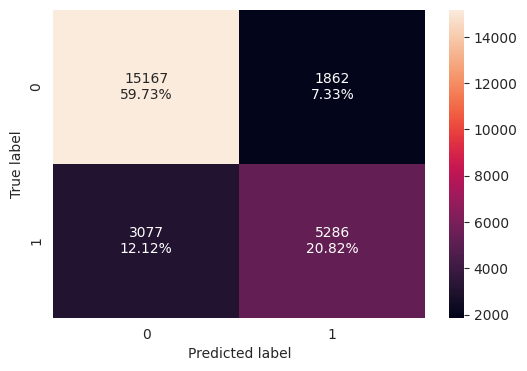

In [284]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [285]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80549 0.63207    0.73951 0.68158

### ROC Curve and ROC-AUC

* ROC-AUC on training set

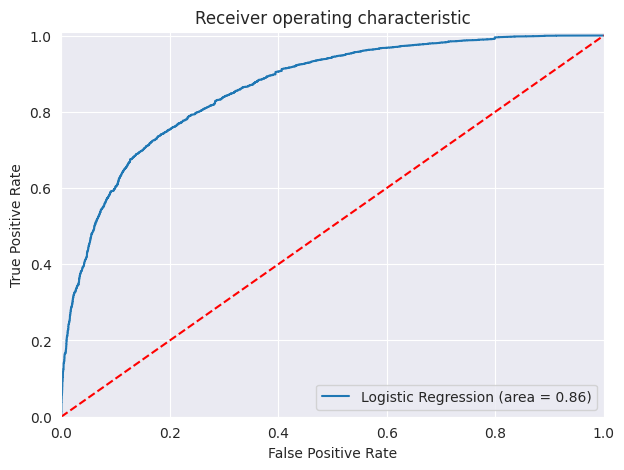

In [286]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [287]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3643024244683939


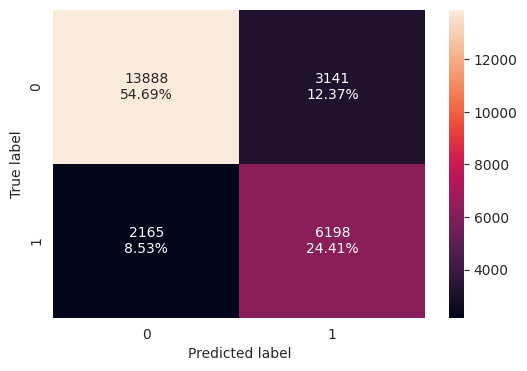

In [288]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
) ## creating the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold 

In [289]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79104 0.74112    0.66367 0.70026

#### Let's use Precision-Recall curve and see if we can find a better threshold

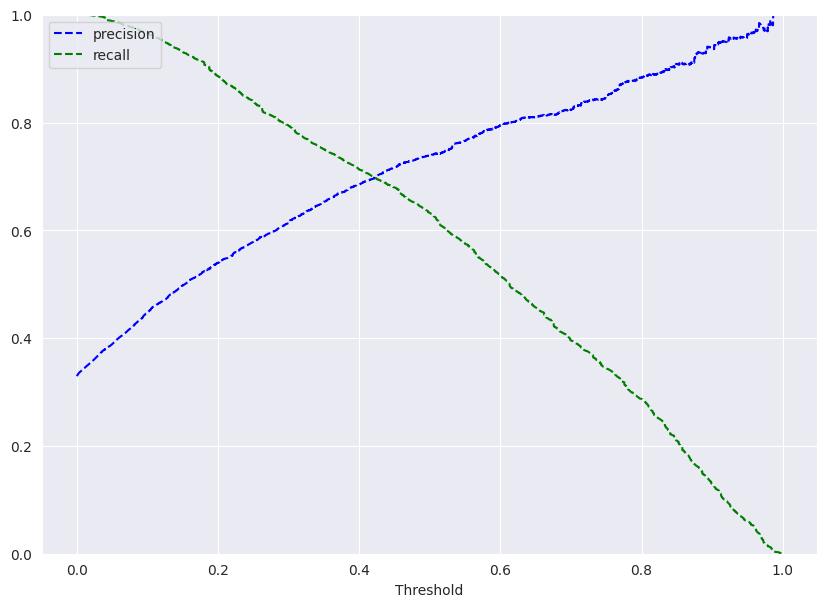

In [290]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [291]:
# setting the threshold
optimal_threshold_curve = 0.42

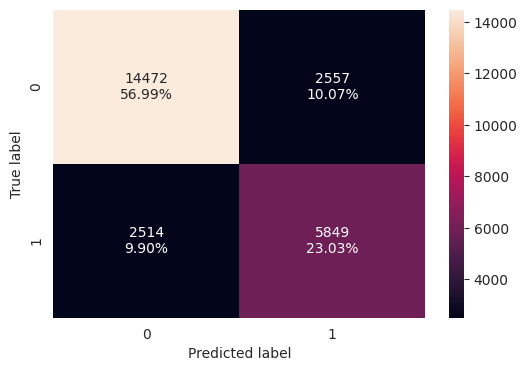

In [292]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1,  X_train1, y_train, threshold=optimal_threshold_curve 
)

In [293]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve


Training performance:


Accuracy  Recall  Precision      F1
0   0.80029 0.69939    0.69581 0.69760

- It seems that the F1 score has slightly decreased when compared to the optimal threshold obtained from the AUC-ROC curve.

#### Let's check the performance on the test set

**Using model with default threshold**

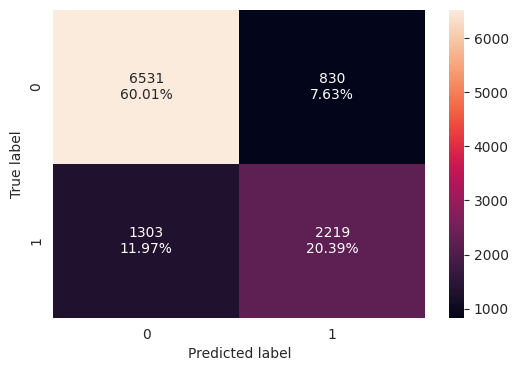

In [294]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [295]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf 

Test performance:


Accuracy  Recall  Precision      F1
0   0.80401 0.63004    0.72778 0.67539

- When applying our model to the test data using the default threshold, we obtained an F1 score of 0.67651. 

* ROC curve on test set

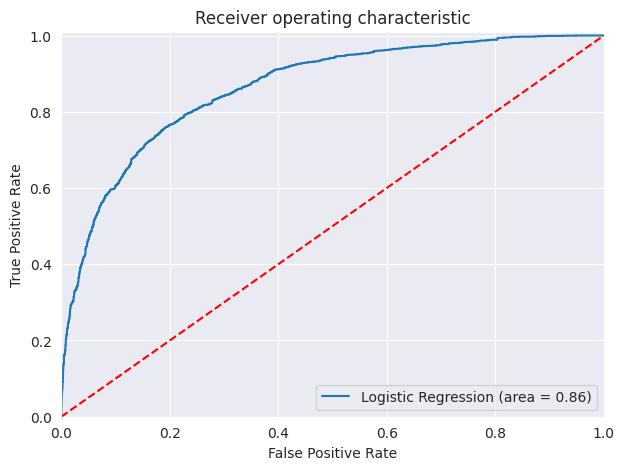

In [296]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

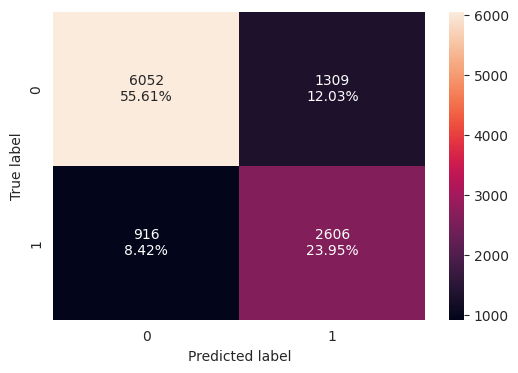

In [297]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.37)

In [298]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79491 0.74532    0.66288 0.70168

**Using model with threshold = 0.42**

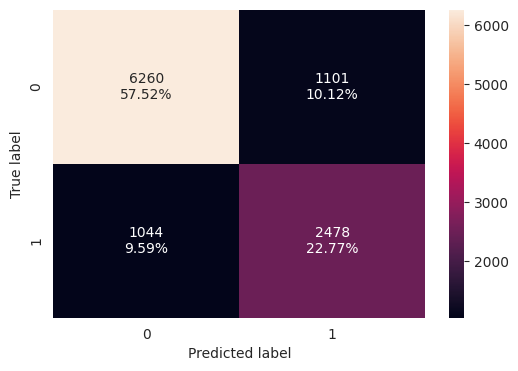

In [299]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.42) 

In [300]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80290 0.70358    0.69237 0.69793

In [301]:
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80549   
Recall                                   0.63207   
Precision                                0.73951   
F1                                       0.68158   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79104   
Recall                                0.74112   
Precision                             0.66367   
F1                                    0.70026   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80029  
Recall                                0.69939  
Precision                             0.69581  
F1                                    0.69760

In [302]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80401   
Recall                                         0.63004   
Precision                                      0.72778   
F1                                             0.67539   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79491   
Recall                                0.74532   
Precision                             0.66288   
F1                                    0.70168   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80290  
Recall                                0.70358  
Precision                             0.69237  
F1                                    0.69793

- All three models demonstrate strong performance on both the training and test data, indicating that they do not suffer from overfitting.

- Based on these results, we can conclude that the logistic regression model with a threshold of 0.37 has the best performance across various metrics, including accuracy, recall, precision, and F1 score. Therefore, it is recommended as the optimal model for predicting booking cancellations in this scenario.
-  This means that if the predicted probability of a booking being canceled exceeds 37%, we will classify it as a cancellation. If the predicted probability falls below 37%, we will classify it as a non-cancellation. This threshold selection allows us to strike a balance between accurately identifying cancellations (high recall) and minimizing false positives (high precision).

## Building a Decision Tree model

In [303]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) 

In [304]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


In [305]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [306]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

- We are goin to build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 

In [307]:
model0 = DecisionTreeClassifier(random_state=1) 
model0.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

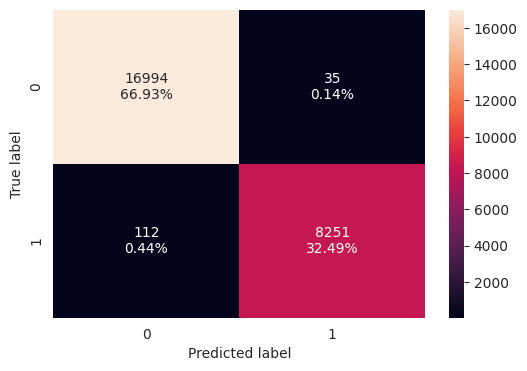

In [308]:
confusion_matrix_sklearn(model0, X_train, y_train) #Checking the confusion matrix with sklearn

In [309]:
#performance measures in training data
decision_tree_perf_train = model_performance_classification_sklearn(model0, X_train, y_train) 
print("Training performance model0:")
decision_tree_perf_train

Training performance model0:


Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

#### Checking model performance on test set

Test performance model0:


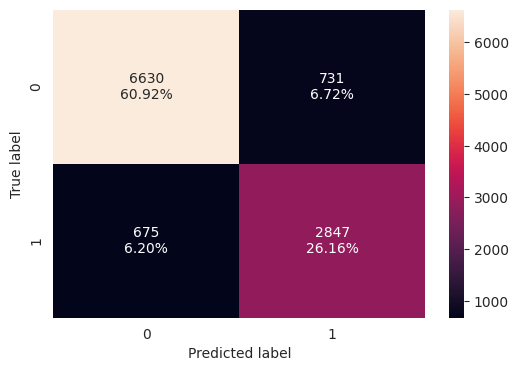

In [310]:
print("Test performance model0:")
confusion_matrix_sklearn(model0, X_test, y_test) #performance measures in test data

In [311]:
decision_tree_perf_test = model_performance_classification_sklearn(model0, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87081 0.80835    0.79570 0.80197

**Before pruning the tree let's check the important features.**

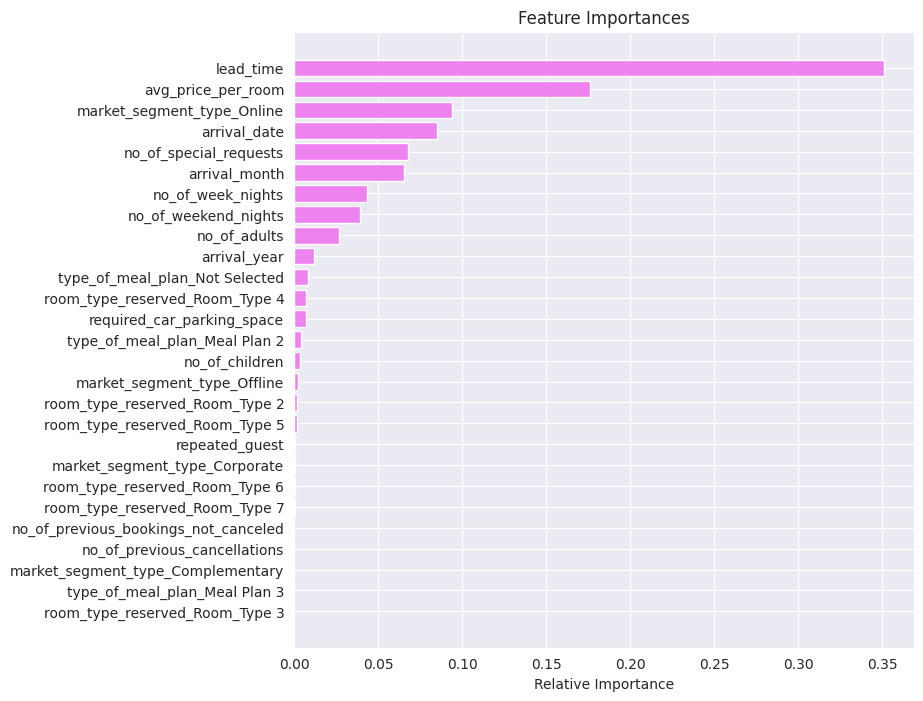

In [312]:
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The feauture importances that are in the top 3 are:
    - lead_time
    - avg_price_per_room
    - market_segment_type_online

## Do we need to prune the tree?

In [313]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

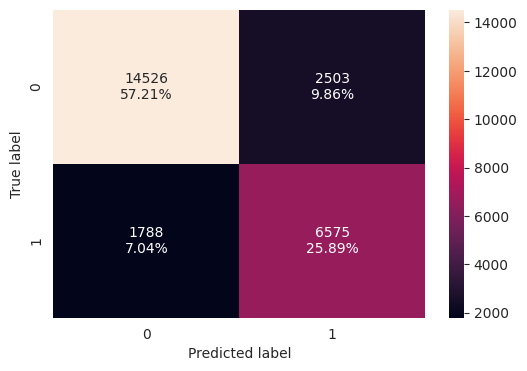

In [314]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [315]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) 
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83101 0.78620    0.72428 0.75397

#### Checking performance on test set

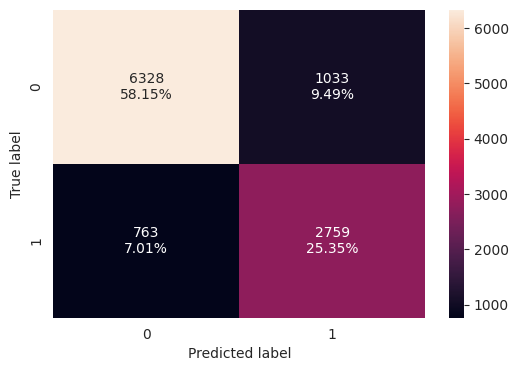

In [316]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [317]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) 
decision_tree_tune_perf_test


Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

#### Visualizing the Decision Tree

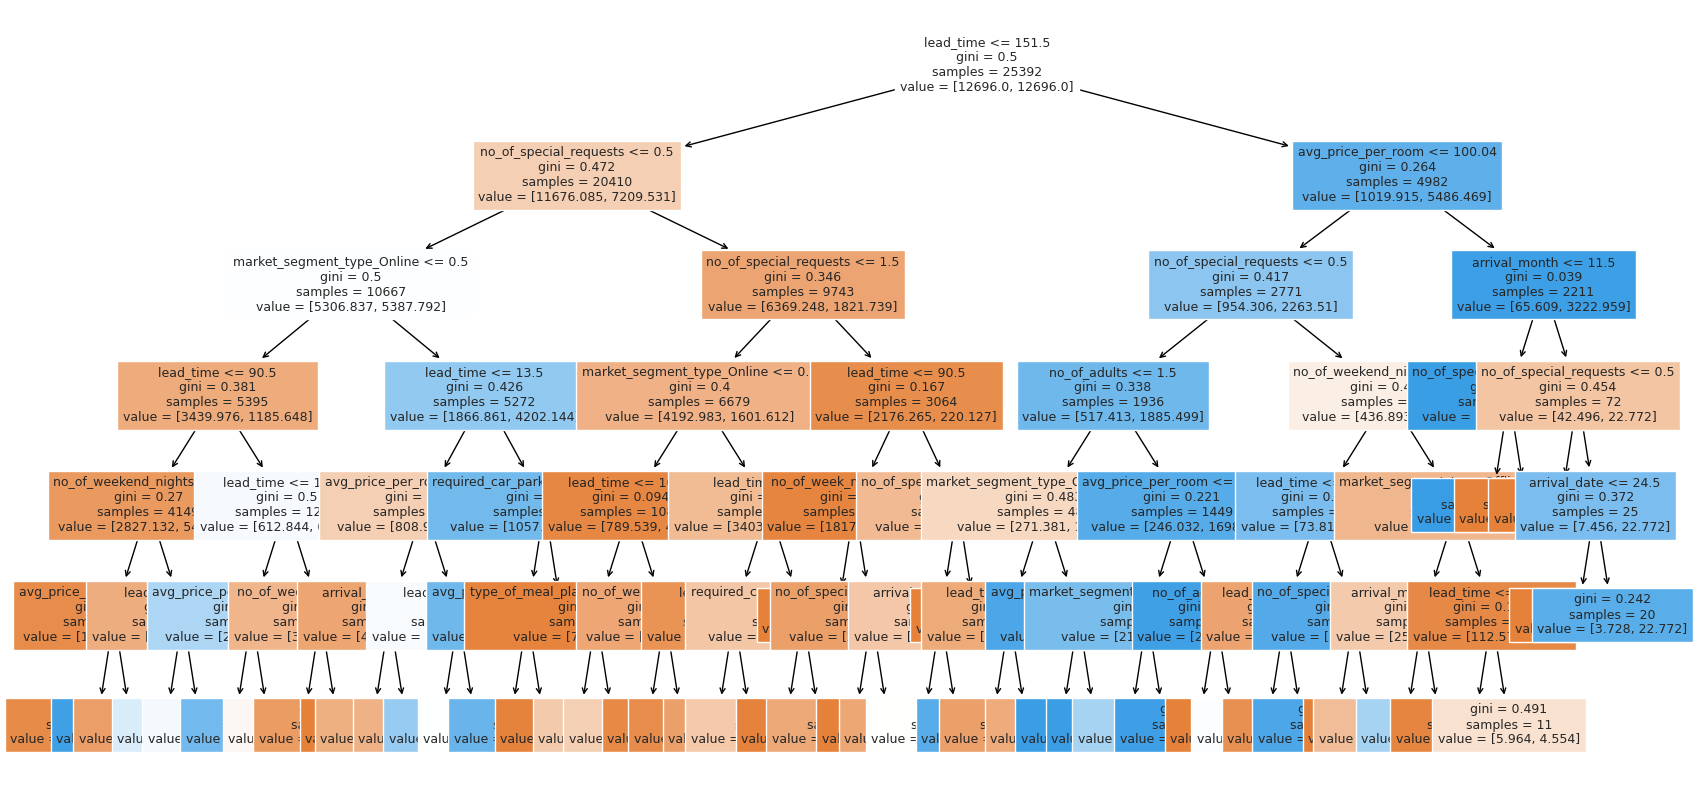

In [318]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [319]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

- The tree has a depth of several levels, indicating that it considers multiple conditions before making a prediction.

- The tree starts by evaluating the lead time feature. If the lead time is less than or equal to 151.50, it further splits the data based on the number of special requests.

- For instances with no special requests, the tree considers additional features such as market segment type, lead time, average price per room, and number of weekend nights to make predictions.

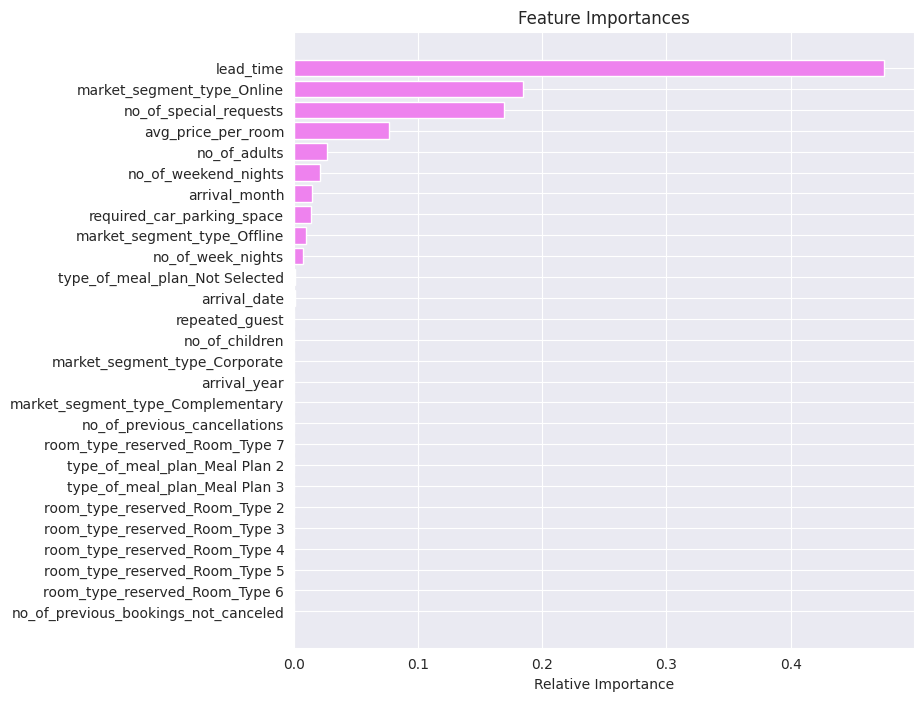

In [320]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The feauture importances the top 3 has changed for estimator:
    - lead_time
    - market_segment_type_online
    - no_of_special_requests

**Cost Complexity Pruning**

In [321]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [322]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1832     0.00890     0.32806
1833     0.00980     0.33786
1834     0.01272     0.35058
1835     0.03412     0.41882
1836     0.08118     0.50000

[1837 rows x 2 columns]

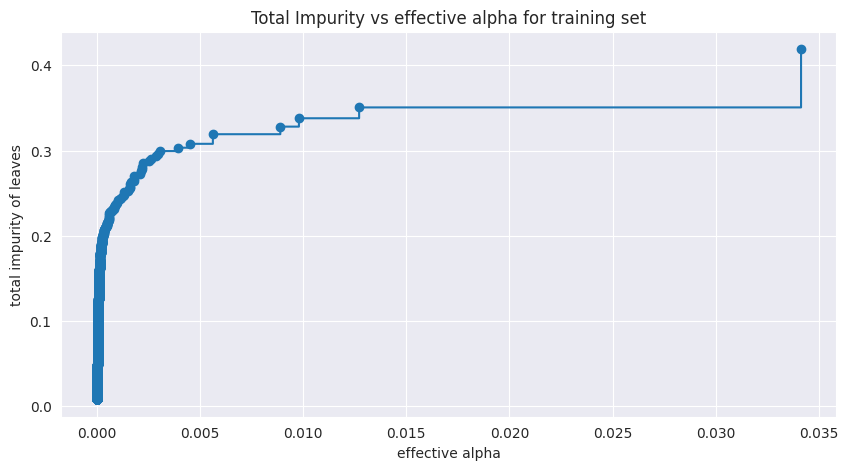

In [323]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [324]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) 
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136949


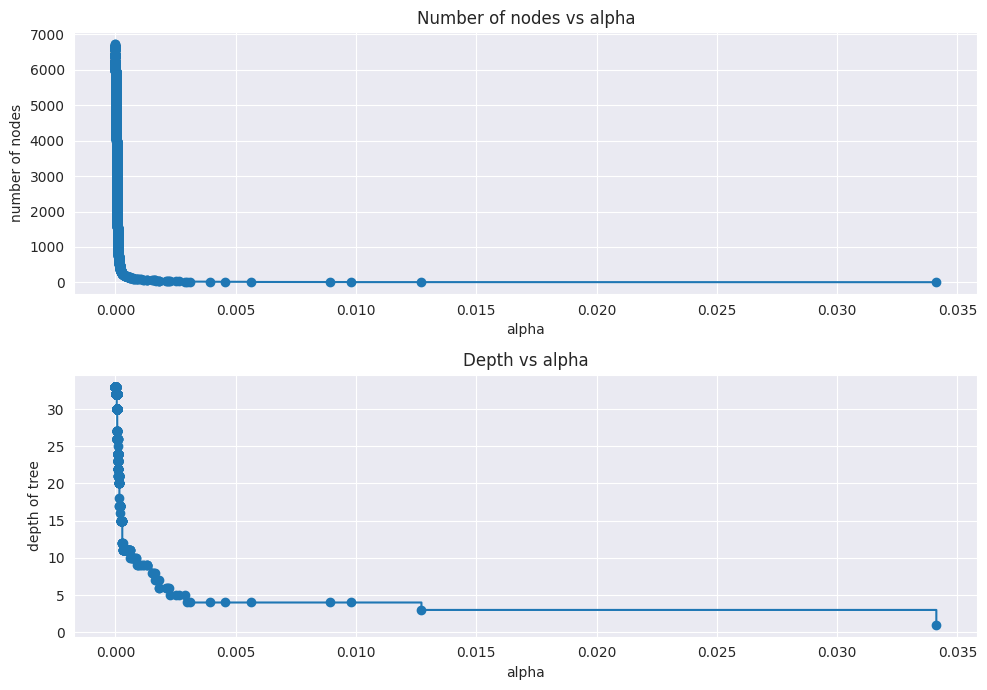

In [325]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [326]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

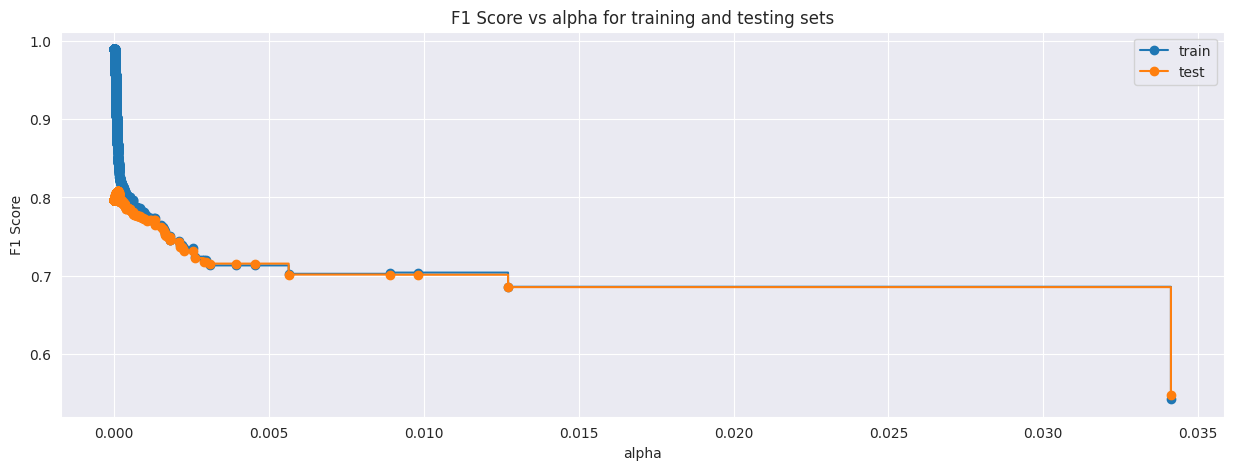

In [327]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [328]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167037,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

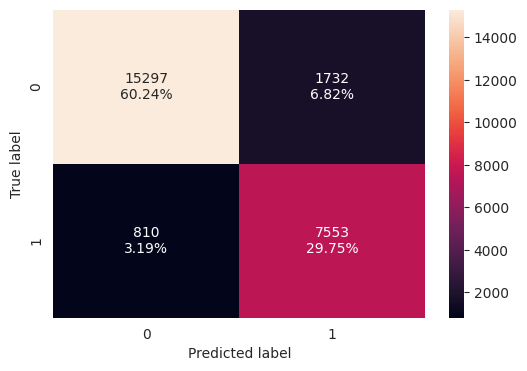

In [329]:
confusion_matrix_sklearn(best_model, X_train, y_train)


In [330]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89989 0.90314    0.81346 0.85596

#### Checking performance on test set

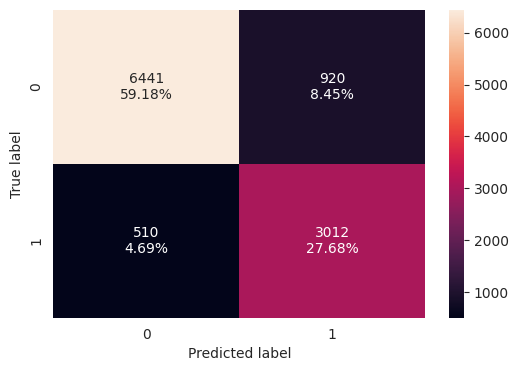

In [331]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [332]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
) 
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86860 0.85520    0.76602 0.80816

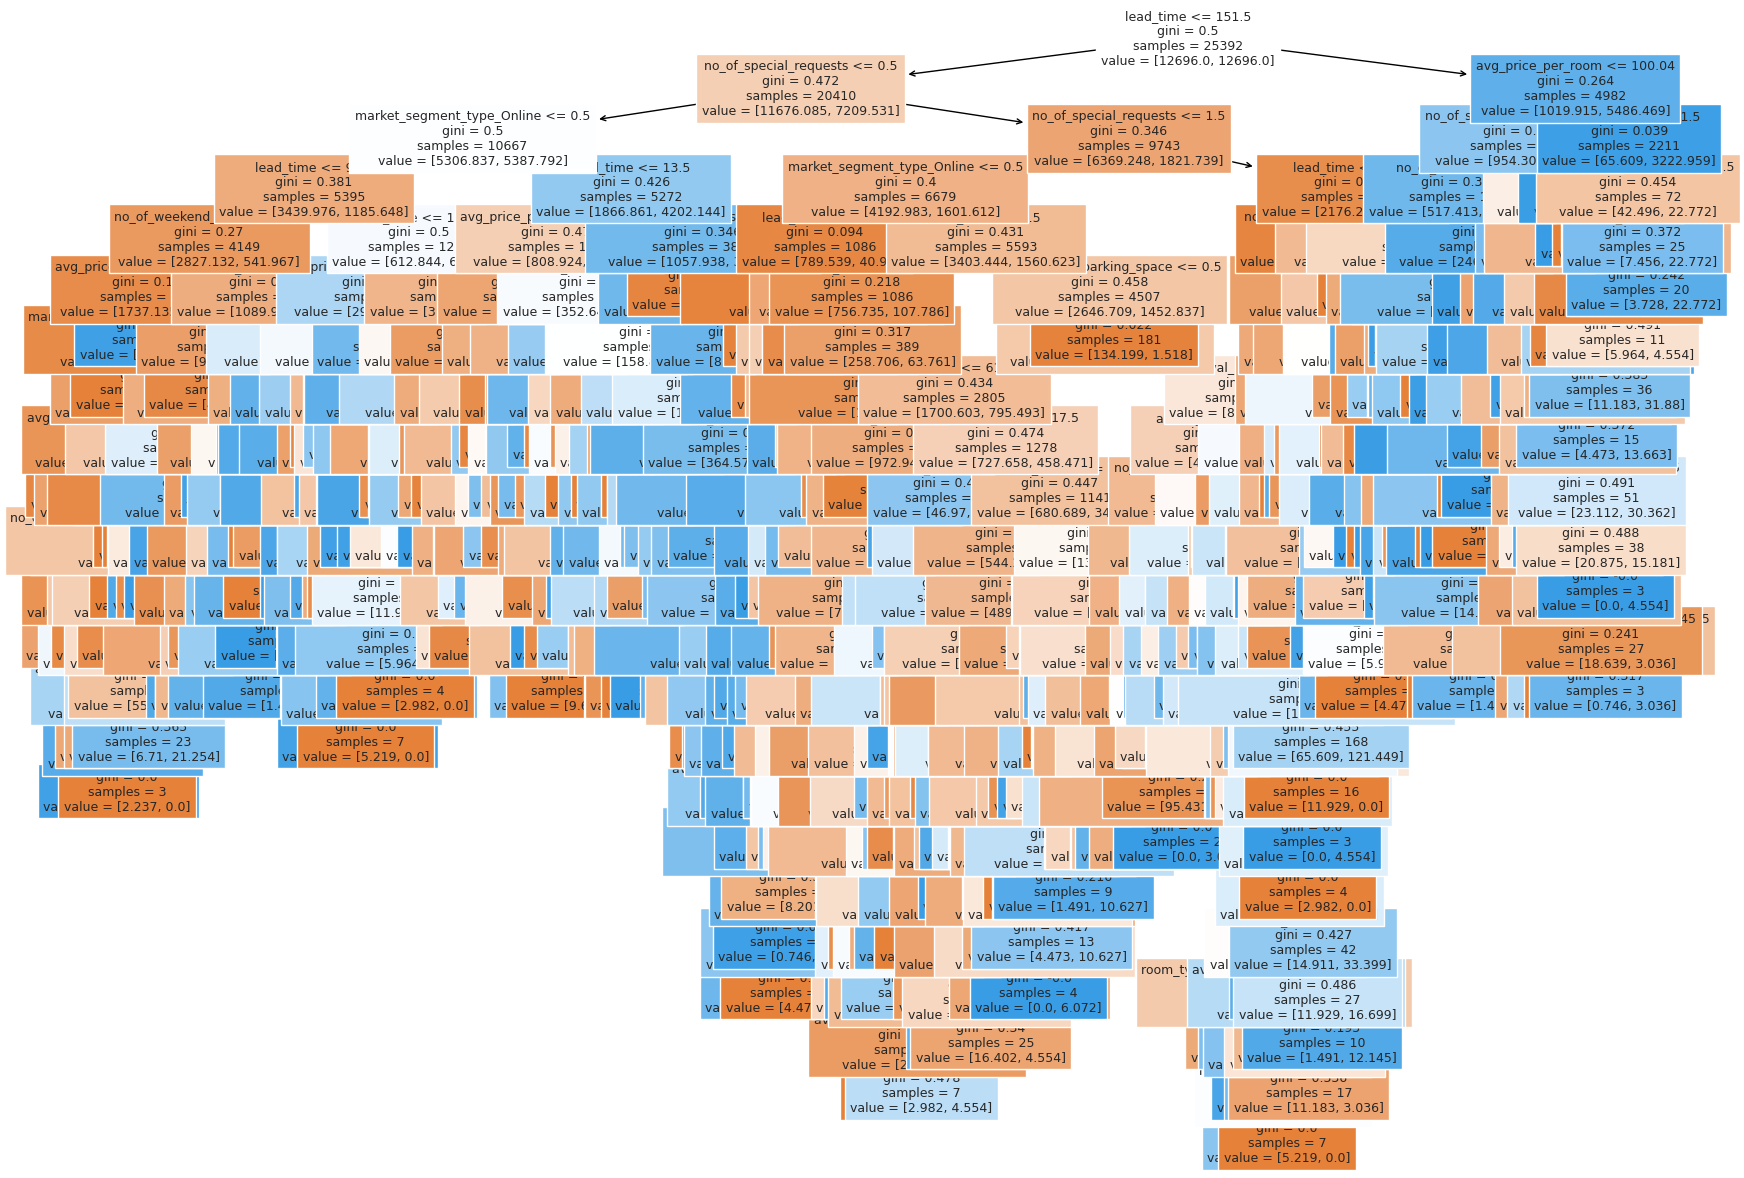

In [333]:
plt.figure(figsize=(20, 15)) #show the decision tree

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [334]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

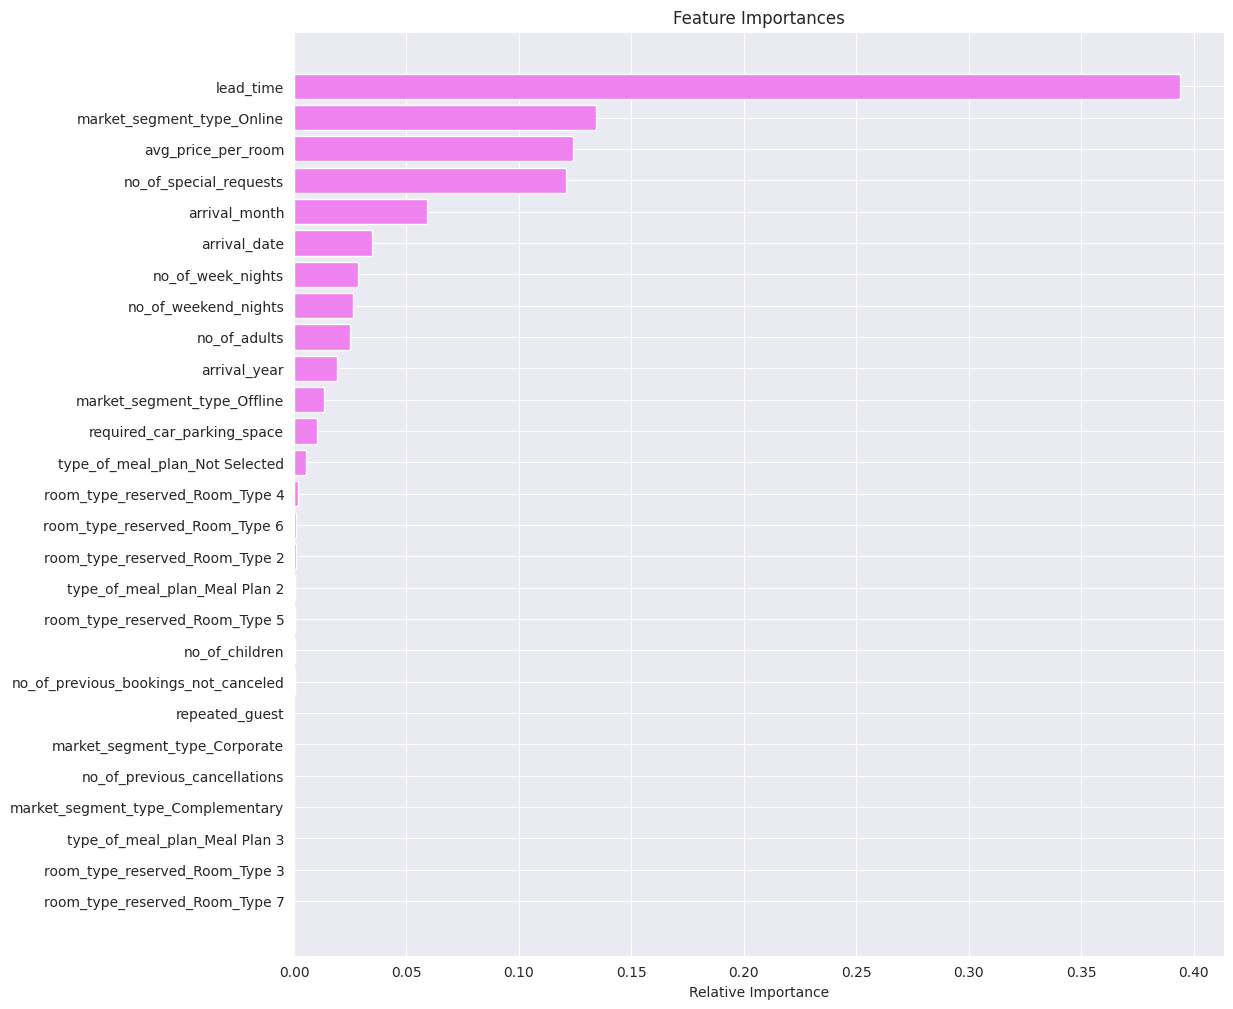

In [335]:
importances = best_model.feature_importances_ #displaying feature importance graph
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [336]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83101   
Recall                   0.98661                      0.78620   
Precision                0.99578                      0.72428   
F1                       0.99117                      0.75397   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89989  
Recall                          0.90314  
Precision                       0.81346  
F1                              0.85596

In [337]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
       decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.87081                      0.83497   
Recall                             0.80835                      0.78336   
Precision                          0.79570                      0.72758   
F1                                 0.80197                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86860  
Recall                          0.85520  
Precision                       0.76602  
F1                              0.80816

* Decision tree with post-pruning is giving the highest recall on the test set.
    * The tree with post pruning is easy to interpret.
    - Lead Time: Bookings with a lead time greater than 151.50 are more likely to be canceled.
    - Average Price per Room: Bookings with a higher average price per room (> 196.50) are more likely to be canceled.

## Actionable Insights and Recommendations


1. The model with a threshold of 0.37 performs better than the other models across multiple evaluation metrics, such as accuracy, precision, recall, and F1 score. Therefore, it is recommended as the optimal choice for accurate cancellation predictions.
2. Among the different decision tree models tested, the one with post-pruning has the highest recall on the test set. Recall measures the model's ability to correctly identify actual booking cancellations. A higher recall suggests that the model is more effective at capturing real cancellations. The recommended model is the decision tree with post-pruning for maximizing the detection of booking cancellations.


- What profitable policies for cancellations and refunds can the hotel adopt?
   - The hotel can offer a refund policy where the amount decreases as the check-in date approaches. This may encourage guests to cancel well in advance, giving the hotel an opportunity to rebook the room.
   - Also, it could include an option to modify the booking that allows the customer to make changes up to a certain day before check-in, this may prevent cancellations when they just want changes in the reservation.
 - What other recommendations would you suggest to the hotel?

   - The hotel may consider paying special attention to Lead time, Online market segment and average price per room because according to the decision tree model thore are the most important variables in determining if a booking will be cancelled.
   - The prices of rooms in different market segments can vary significantly. In particular, the online market segment, which makes up the majority of our guests at 64%, generally has higher prices compared to other segments. This could happen for the dynamics of online booking platforms who offer convenience, an extensive range of options, and easy price comparison. By recognizing this trend, the marketing team can take advantage of the opportunity to attract more customers.
   - From the analysis of the data, it is clear that there is a seasonal pattern in the booking behavior. The number of bookings starts to increase from August, reaching its peak in October with 5317 bookings. This period likely corresponds to a popular travel season or event. After October, the number of bookings gradually decreased, with November still showing a relatively high number of bookings (2980). However, there is a significant decline in December, January, and February, with January having the lowest number of bookings (1014).
       - The marketing team can take advantage of this trend by designing a strong campaign to increase bookings during the winter season. They can achieve this by offering appealing deals that attract more customers, resulting in higher occupancy rates.
       - Also by aligning business decisions with booking patterns, hotels can effectively allocate resources and optimize operations year-round. During busy times, hiring extra staff is important to provide great customer service and handle the increased demand efficiently. In contrast, during slower periods, adjusting staffing levels and optimizing operations can help manage costs while still delivering a high level of service.
   - According to the analysis repeated guests are less likely to cancel a booking, implement a loyalty program that offers benefits and rewards to these customers can encourage guests to choose your hotel for future stays and reduce the likelihood of cancellations. 


- INN Hotels should keep getting data and making further analysis about the reasons customers have to cancel and also . 


In [397]:
%%shell

jupyter nbconvert --to html /content/Project_SLC_DSBA_INNHotels_FullCode.ipynb

[NbConvertApp] Converting notebook /content/Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] Writing 5091182 bytes to /content/Project_SLC_DSBA_INNHotels_FullCode.html
